# About Data

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---

# Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

# Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import colorama
from colorama import Fore, Back, Style  # makes strings colored
from termcolor import colored
# from skimpy import clean_columns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

params = {
'figure.figsize':(12,6),
'figure.titlesize':15,
'font.size': 10,
'axes.titlesize': 15,
'axes.labelsize': 10,
'xtick.labelsize': 10,
'ytick.labelsize': 10,
'legend.fontsize': 10,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)

In [2]:
# Some Useful Functions

###############################################################################

def first_look(col):
    print(Back.BLACK + Fore.YELLOW, "Column name    : ", col, Style.RESET_ALL)
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Value counts")
    print(df[col].value_counts(dropna = False))
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Descriptive statistics")
    print(df[col].describe())
    print()

    
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicated rows were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

###############################################################################
    

In [3]:
df_original = pd.read_csv("Online Retail.csv")
df = df_original.copy()
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
5  2010-12-01 08:26:00      7.650   17850.000  United Kingdom  
6  2010-12-01 08:26:00      4.250   17850.000  United Kingdom  
7  2010-12-01 08:28:00      1.850   17850.000  United Kingdom  
8  2010-12-01 08:28:00      1.850   17850.000  United Kingdom  
9  2010-12-01 08:34:00      1.690   13047.000  United Kingdom

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
duplicate_values(df)

Duplicate check...
5268 Duplicated rows were dropped!
-------------------------------------------------------------------------------


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

## Descriptive Statistics

In [8]:
df.describe(exclude="number").T

count unique                                 top    freq
InvoiceNo    536641  25900                              573585    1114
StockCode    536641   4070                              85123A    2301
Description  535187   4223  WHITE HANGING HEART T-LIGHT HOLDER    2357
InvoiceDate  536641  23260                 2011-10-31 14:41:00    1114
Country      536641     38                      United Kingdom  490300

In [9]:
df.describe(include="number").T

count      mean      std        min       25%       50%  \
Quantity   536641.000     9.620  219.130 -80995.000     1.000     3.000   
UnitPrice  536641.000     4.633   97.233 -11062.060     1.250     2.080   
CustomerID 401604.000 15281.161 1714.006  12346.000 13939.000 15145.000   

                 75%       max  
Quantity      10.000 80995.000  
UnitPrice      4.130 38970.000  
CustomerID 16784.000 18287.000

In [10]:
for i in df.columns:
    first_look(i)

 Column name    :  InvoiceNo 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  25900
-------------------------------- 
Value counts
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
-------------------------------- 
Descriptive statistics
count     536641
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: object

 Column name    :  StockCode 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4070
-------------------------------- 
Value counts
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: StockCode, Length: 4070, dtype: int64
-------------------------------- 
Descriptive statistics

## i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [11]:
df[df["Quantity"]<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:41:00     27.500   14527.000  United Kingdom  
154     2010-12-01 09:49:00      4.650   15311.000  United Kingdom  
235     2010-12-01 10:24:00      1.650   17548.000  United Kingdom  
236     2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
237     2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
...                     ...        ...         ...             ...  
540449  2011-12-09 09:57:00      0.830   14397.000  United Kingdom  
541541  2011-12-09 10:28:00    224.690   15498.000  United Kingdom  
541715  2011-12-09 11:57:00     10.950   15311.000  United Kingdom  
541716  2011-12-09 11:58:00      1.250   17315.000  United Kingdom  
541717  2011-12-09 11:58:00      1.250   17315.000  United Kingdom  

[10587 rows x 8 columns]

In [12]:
df[df["Quantity"]<0]["InvoiceNo"].nunique()

5172

In [13]:
df[(df["InvoiceNo"].str.startswith("C")==True)&(df["Quantity"]>0)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [14]:
df[df["Quantity"]<0][~(df[df["Quantity"]<0]["InvoiceNo"].str.startswith("C")== True)]

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
2406      536589     21777         NaN       -10  2010-12-01 16:50:00   
4347      536764    84952C         NaN       -38  2010-12-02 14:42:00   
7188      536996     22712         NaN       -20  2010-12-03 15:30:00   
7189      536997     22028         NaN       -20  2010-12-03 15:30:00   
7190      536998     85067         NaN        -6  2010-12-03 15:30:00   
...          ...       ...         ...       ...                  ...   
535333    581210     23395       check       -26  2011-12-07 18:36:00   
535335    581212     22578        lost     -1050  2011-12-07 18:38:00   
535336    581213     22576       check       -30  2011-12-07 18:38:00   
536908    581226     23090     missing      -338  2011-12-08 09:56:00   
538919    581422     23169     smashed      -235  2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  
2406        0.000         NaN  United Kingdom  
4347        0.000         NaN  United Kingdom  
7188        0.000         NaN  United Kingdom  
7189        0.000         NaN  United Kingdom  
7190        0.000         NaN  United Kingdom  
...           ...         ...             ...  
535333      0.000         NaN  United Kingdom  
535335      0.000         NaN  United Kingdom  
535336      0.000         NaN  United Kingdom  
536908      0.000         NaN  United Kingdom  
538919      0.000         NaN  United Kingdom  

[1336 rows x 8 columns]

## ii. What does the letter "C" in the InvoiceNo column mean?

hint: If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

#### Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


In [15]:
df[df["UnitPrice"]<0]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983 -11062.060         NaN  United Kingdom  
299984 -11062.060         NaN  United Kingdom

In [16]:
df[df["StockCode"]=="B"]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982  11062.060         NaN  United Kingdom  
299983 -11062.060         NaN  United Kingdom  
299984 -11062.060         NaN  United Kingdom

In [17]:
df.drop(index=df[df["StockCode"]=="B"].index, inplace=True)

In [18]:
df["InvoiceNo"] = df["InvoiceNo"].astype(str).str.extract("(\d+)").astype(int)

In [19]:
df[df["UnitPrice"] == 0].sample(5)

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
320621     565063     21175         NaN       -18  2011-08-31 17:15:00   
168664     551126     82483         NaN        18  2011-04-26 12:47:00   
514205     579688     21116         NaN       -33  2011-11-30 13:51:00   
285886     561927     22740           ?     -1060  2011-08-01 12:49:00   
538919     581422     23169     smashed      -235  2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  
320621      0.000         NaN  United Kingdom  
168664      0.000         NaN  United Kingdom  
514205      0.000         NaN  United Kingdom  
285886      0.000         NaN  United Kingdom  
538919      0.000         NaN  United Kingdom

In [20]:
df.drop(index=df[df["UnitPrice"] == 0].index, inplace=True)

## iii. Handling Missing Values

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


In [21]:
for i in df.columns:
    print(f"Null values in {i} column is =  %", round(df[i].isnull().sum()/df.shape[0]*100,2))

Null values in InvoiceNo column is =  % 0.0
Null values in StockCode column is =  % 0.0
Null values in Description column is =  % 0.0
Null values in Quantity column is =  % 0.0
Null values in InvoiceDate column is =  % 0.0
Null values in UnitPrice column is =  % 0.0
Null values in CustomerID column is =  % 24.82
Null values in Country column is =  % 0.0


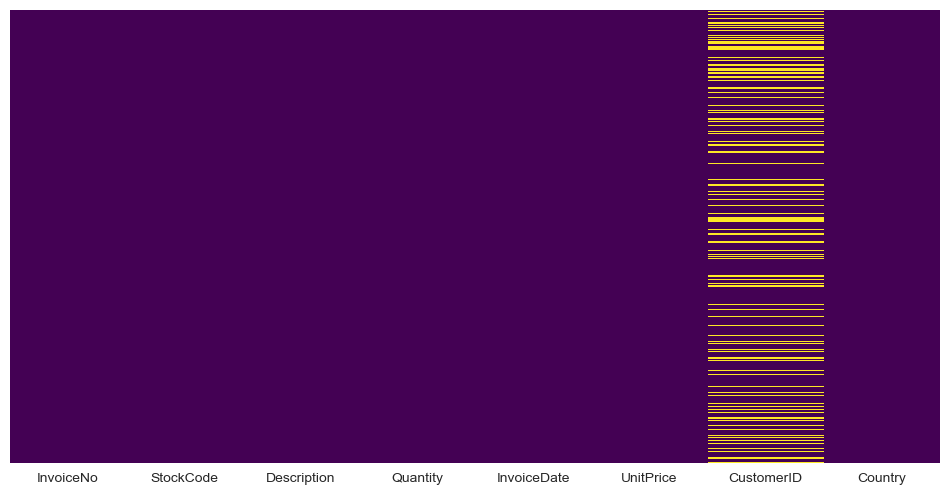

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

## iv. Clean the Data from the Noise and Missing Values

In [23]:
df = df[df["CustomerID"].notnull()]
df["CustomerID"]=df["CustomerID"].astype(int)

In [24]:
df = df[df["Quantity"] > 0]
df.reset_index(drop=True, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int32  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  int32  
 7   Country      392692 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 21.0+ MB


## v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [26]:
#number of InvoiceNo per customer

df.groupby("CustomerID", as_index=False)["InvoiceNo"].nunique()

CustomerID  InvoiceNo
0          12346          1
1          12347          7
2          12348          4
3          12349          1
4          12350          1
...          ...        ...
4333       18280          1
4334       18281          1
4335       18282          2
4336       18283         16
4337       18287          3

[4338 rows x 2 columns]

2. What's the average number of unique items per order or per customer?

In [27]:
#number of unique products per customer

df.groupby("CustomerID", as_index=False)["StockCode"].nunique()

CustomerID  StockCode
0          12346          1
1          12347        103
2          12348         22
3          12349         73
4          12350         17
...          ...        ...
4333       18280         10
4334       18281          7
4335       18282         12
4336       18283        263
4337       18287         59

[4338 rows x 2 columns]

In [28]:
df.groupby("CustomerID")["StockCode"].nunique().mean()

61.50115260488705

In [29]:
df.groupby("InvoiceNo", as_index=False)["StockCode"].nunique()

InvoiceNo  StockCode
0         536365          7
1         536366          2
2         536367         12
3         536368          4
4         536369          1
...          ...        ...
18527     581583          2
18528     581584          2
18529     581585         21
18530     581586          4
18531     581587         15

[18532 rows x 2 columns]

In [30]:
df.groupby("InvoiceNo")["StockCode"].nunique().mean()

20.92817828620764

3. Let's see how this compares to the number of unique products per customer.

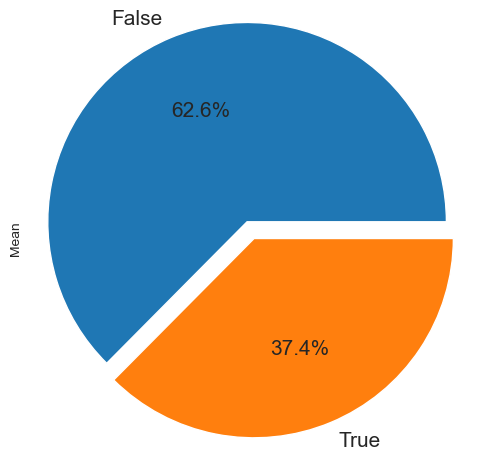

In [31]:
df_product_mean = df.groupby(["CustomerID","InvoiceNo"])["StockCode"].nunique().groupby("CustomerID").mean().to_frame("Mean")
(df_product_mean["Mean"]>21).value_counts().plot.pie( autopct="%.1f%%",radius=1.1, fontsize=15, explode=[0.1,0]);

(0.0, 120.0)

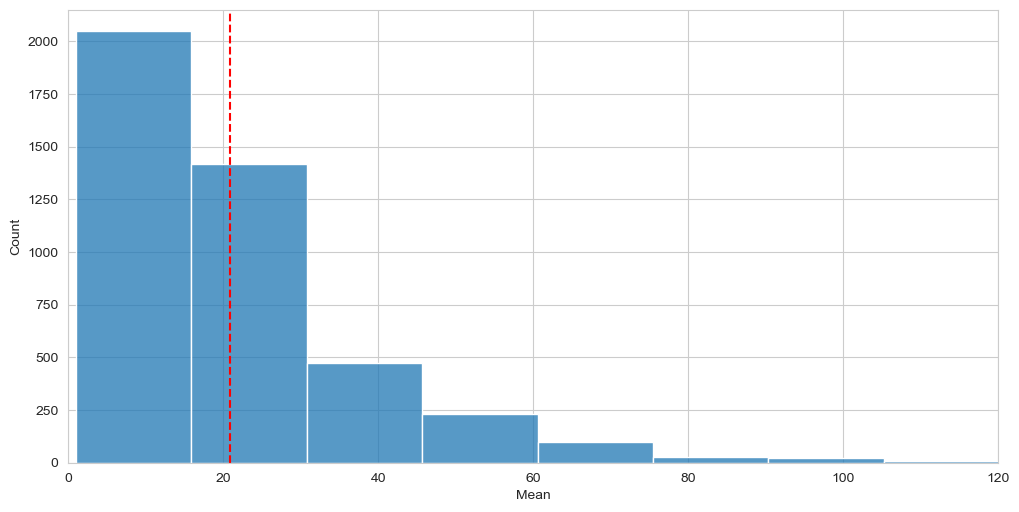

In [32]:
sns.histplot(data=df_product_mean,x="Mean",bins=20)
mean=df.groupby("InvoiceNo")["StockCode"].nunique().mean()
plt.axvline(mean, color='r', linestyle='--')
plt.xlim(0,120)

In [33]:
df.groupby("CustomerID")["InvoiceNo"].nunique().mean()

4.272014753342554

(0.0, 10.0)

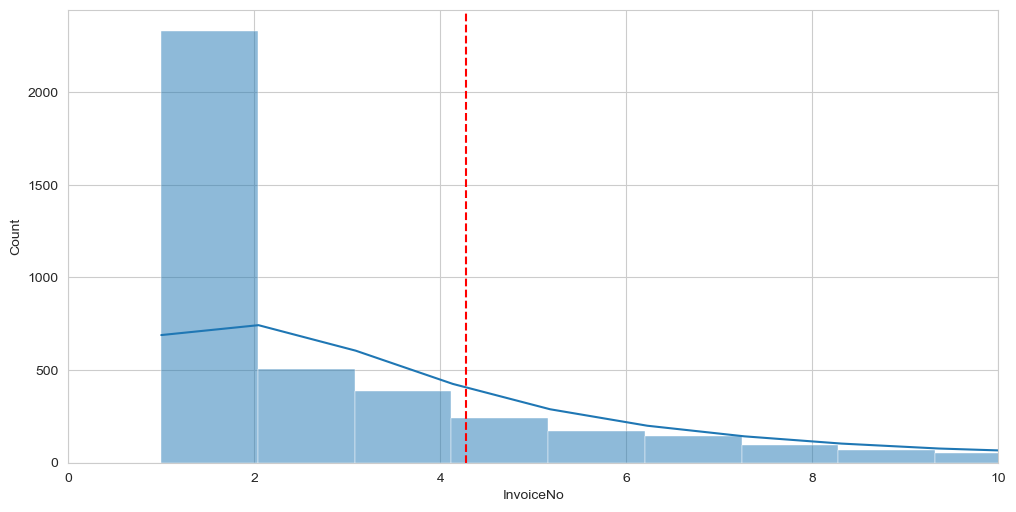

In [34]:
sns.histplot(data=df.groupby("CustomerID")["InvoiceNo"].nunique(),bins=200,kde=True)
mean=df.groupby("CustomerID")["InvoiceNo"].nunique().mean()
plt.axvline(mean, color='r', linestyle='--')
plt.xlim(0,10)

## vi. Explore Customers by Country

1. What's the total revenue per country?

In [35]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00      2.550       17850  United Kingdom      15.300  
1  2010-12-01 08:26:00      3.390       17850  United Kingdom      20.340  
2  2010-12-01 08:26:00      2.750       17850  United Kingdom      22.000  
3  2010-12-01 08:26:00      3.390       17850  United Kingdom      20.340  
4  2010-12-01 08:26:00      3.390       17850  United Kingdom      20.340

In [36]:
x = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)[:10].index
y = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)[:10].values
df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)

Country
United Kingdom         7285024.644
Netherlands             285446.340
EIRE                    265262.460
Germany                 228678.400
France                  208934.310
Australia               138453.810
Spain                    61558.560
Switzerland              56443.950
Belgium                  41196.340
Sweden                   38367.830
Japan                    37416.370
Norway                   36165.440
Portugal                 33375.840
Finland                  22546.080
Singapore                21279.290
Channel Islands          20440.540
Denmark                  18955.340
Italy                    17483.240
Cyprus                   13502.850
Austria                  10198.680
Poland                    7334.650
Israel                    7215.840
Greece                    4760.520
Iceland                   4310.000
Canada                    3666.380
USA                       3580.390
Malta                     2725.590
Unspecified               2660.770
United Arab 

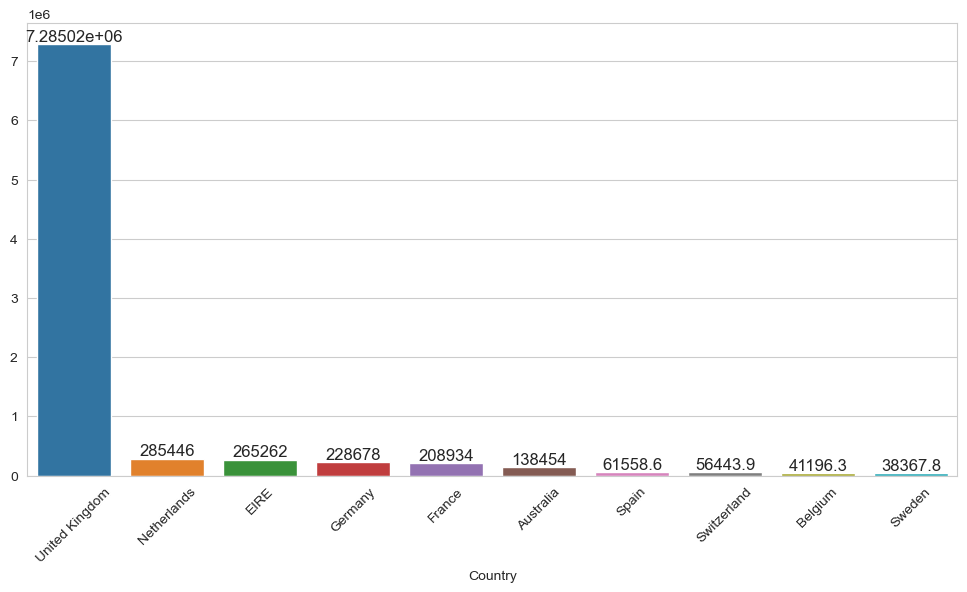

In [37]:
ax = sns.barplot(x=x,y=y)
ax.bar_label(ax.containers[0], fontsize=12);
plt.xticks(rotation=45);

2. Visualize number of customer per country

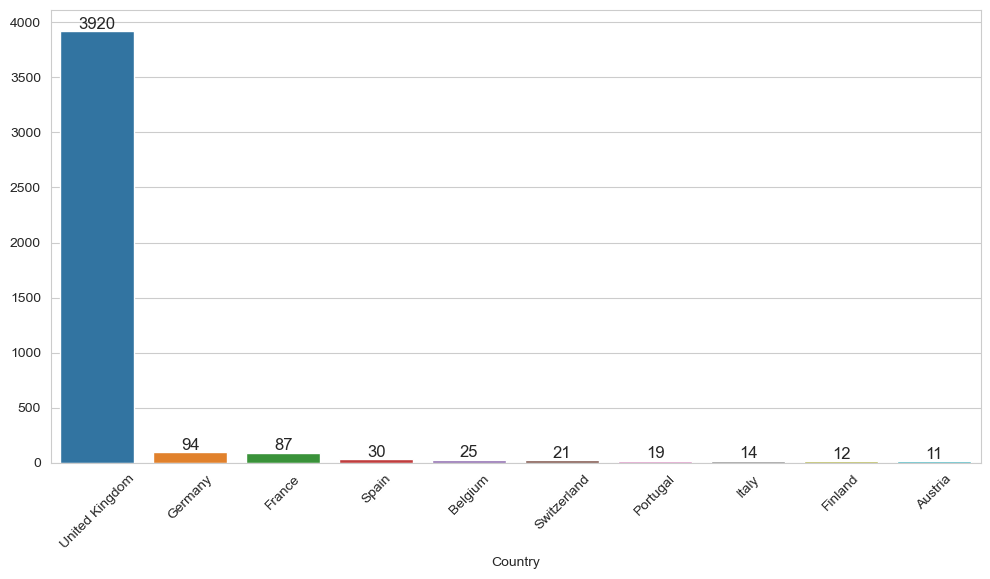

In [38]:
top_ten_country = df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False)[:10]
ax = sns.barplot(x=top_ten_country.index, y=top_ten_country.values)
ax.bar_label(ax.containers[0], fontsize=12);
plt.xticks(rotation=45);

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [39]:
df_uk = df[df["Country"] == "United Kingdom"].drop("Country", axis=1).reset_index(drop = True)
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID  TotalPrice  
0  2010-12-01 08:26:00      2.550       17850      15.300  
1  2010-12-01 08:26:00      3.390       17850      20.340  
2  2010-12-01 08:26:00      2.750       17850      22.000  
3  2010-12-01 08:26:00      3.390       17850      20.340  
4  2010-12-01 08:26:00      3.390       17850      20.340

In [40]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349203 entries, 0 to 349202
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    349203 non-null  int32  
 1   StockCode    349203 non-null  object 
 2   Description  349203 non-null  object 
 3   Quantity     349203 non-null  int64  
 4   InvoiceDate  349203 non-null  object 
 5   UnitPrice    349203 non-null  float64
 6   CustomerID   349203 non-null  int32  
 7   TotalPrice   349203 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 18.6+ MB


2. What are the most popular products that are bought in the UK?

<AxesSubplot:xlabel='StockCode'>

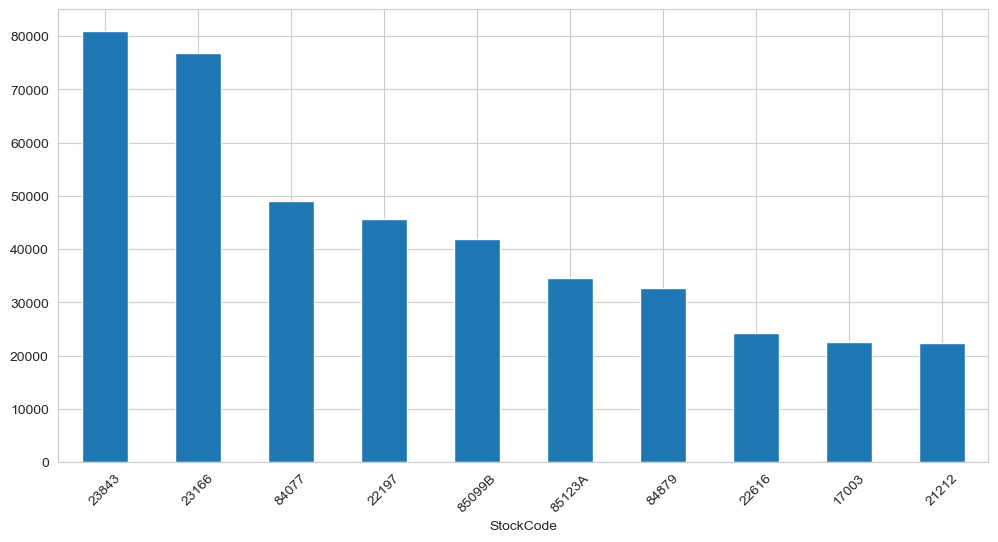

In [41]:
df_uk.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind="bar", rot=45)

<AxesSubplot:xlabel='Description'>

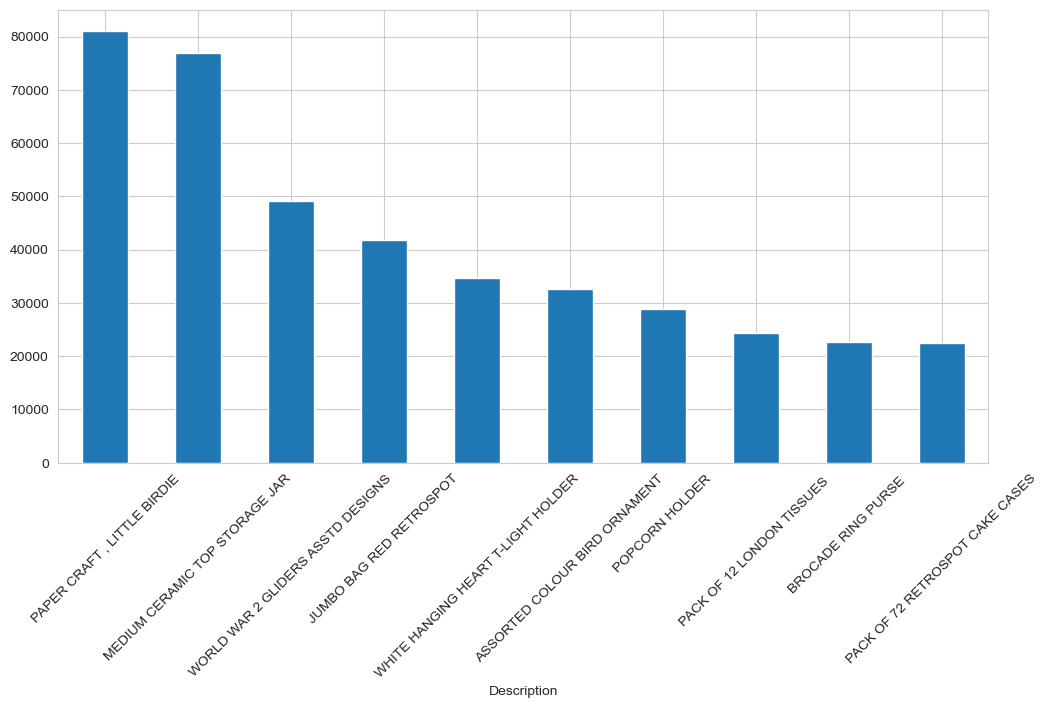

In [42]:
df_uk.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind="bar", rot=45)

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal with RFM is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value

Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

In [43]:
import datetime as dt
from datetime import datetime, timedelta

In [44]:
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID  TotalPrice  
0  2010-12-01 08:26:00      2.550       17850      15.300  
1  2010-12-01 08:26:00      3.390       17850      20.340  
2  2010-12-01 08:26:00      2.750       17850      22.000  
3  2010-12-01 08:26:00      3.390       17850      20.340  
4  2010-12-01 08:26:00      3.390       17850      20.340

In [45]:
df_uk.InvoiceDate = pd.to_datetime(df_uk.InvoiceDate)

In [46]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349203 entries, 0 to 349202
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  int32         
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  int32         
 7   TotalPrice   349203 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 18.6+ MB


### iii. Recency: Days since last purchase

In [47]:
df_uk["date"] = df_uk.InvoiceDate.dt.date
current_date = df_uk.InvoiceDate.dt.date.max()
current_date

datetime.date(2011, 12, 9)

In [48]:
recency = df_uk.groupby('CustomerID', as_index=False)['date'].max().rename(columns={"date":"Last_Purchase"})
recency

CustomerID Last_Purchase
0          12346    2011-01-18
1          12747    2011-12-07
2          12748    2011-12-09
3          12749    2011-12-06
4          12820    2011-12-06
...          ...           ...
3915       18280    2011-03-07
3916       18281    2011-06-12
3917       18282    2011-12-02
3918       18283    2011-12-06
3919       18287    2011-10-28

[3920 rows x 2 columns]

In [49]:
recency["Recency"] = ((current_date - recency['Last_Purchase'])/np.timedelta64(1,"D")).astype(int)
recency.head()

CustomerID Last_Purchase  Recency
0       12346    2011-01-18      325
1       12747    2011-12-07        2
2       12748    2011-12-09        0
3       12749    2011-12-06        3
4       12820    2011-12-06        3

In [50]:
drop_columns(recency, "Last_Purchase")
recency.head()

Last_Purchase were dropped


CustomerID  Recency
0       12346      325
1       12747        2
2       12748        0
3       12749        3
4       12820        3

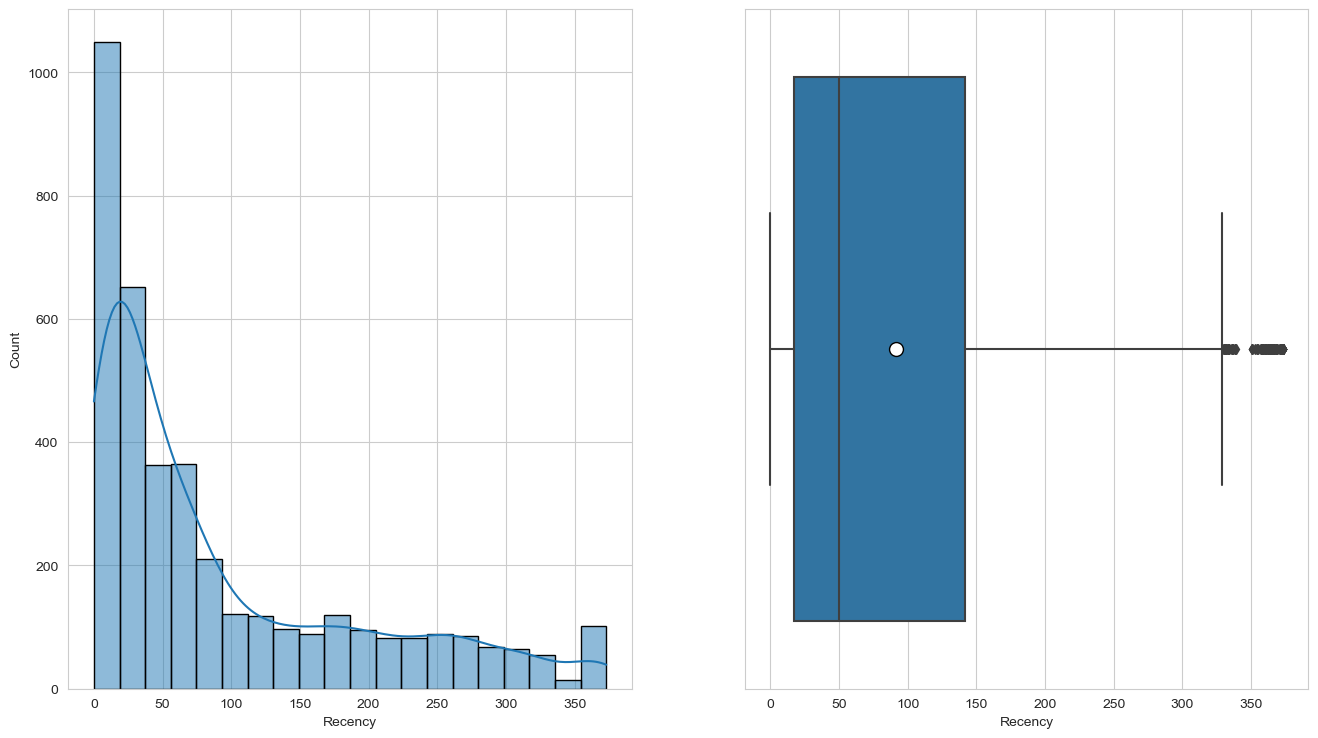

In [51]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
sns.histplot(data = recency, x="Recency", bins=20, edgecolor="black", kde=True, ax = ax[0]);
sns.boxplot(data=recency, 
            x="Recency",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, ax = ax[1]);

### iv. Frequency: Number of purchases


In [52]:
frequency = df_uk.groupby('CustomerID', as_index=False)['InvoiceNo'].nunique().rename(columns={"InvoiceNo":"Frequency"})
frequency

CustomerID  Frequency
0          12346          1
1          12747         11
2          12748        209
3          12749          5
4          12820          4
...          ...        ...
3915       18280          1
3916       18281          1
3917       18282          2
3918       18283         16
3919       18287          3

[3920 rows x 2 columns]

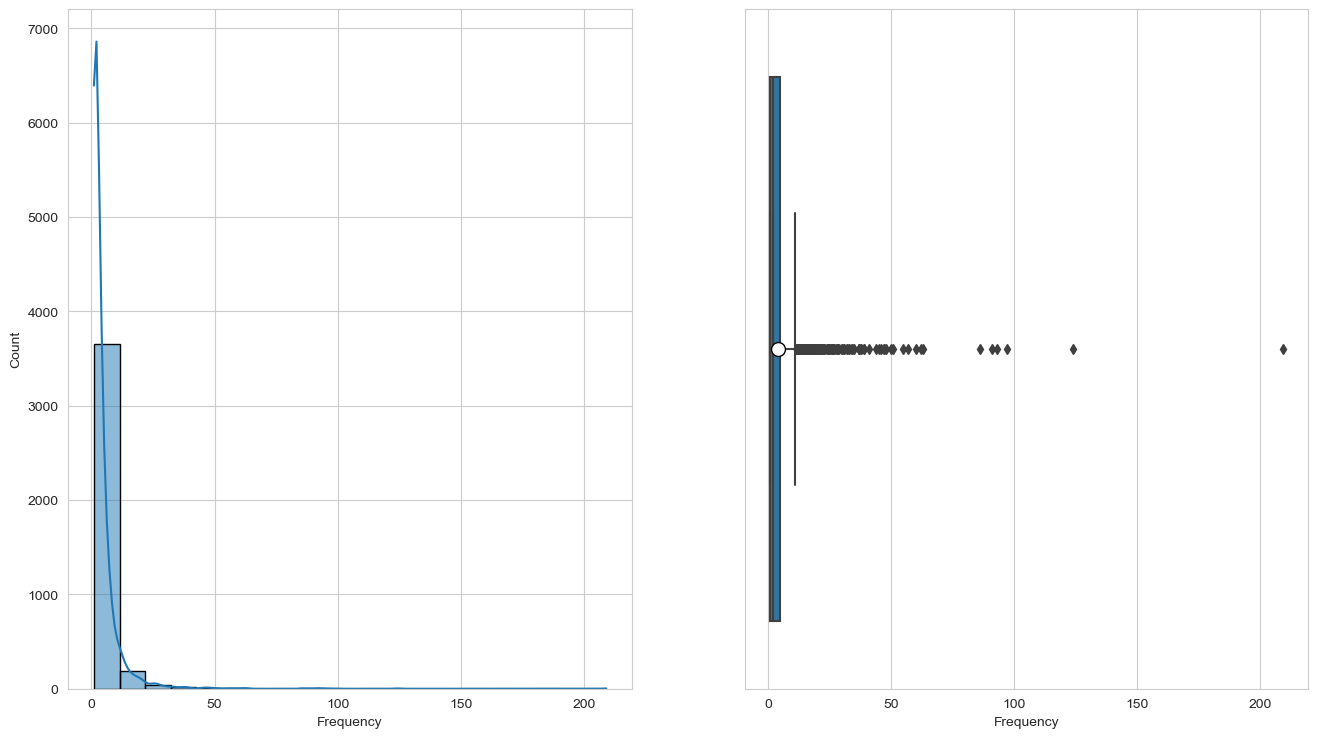

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
sns.histplot(data = frequency, x="Frequency", bins=20, edgecolor="black", kde=True, ax = ax[0]);
sns.boxplot(data=frequency, 
            x="Frequency",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, ax = ax[1]);

### v. Monetary: Total amount of money spent


In [54]:
monetary = df_uk.groupby("CustomerID", as_index=False)["TotalPrice"].sum().rename(columns={"TotalPrice":"Monetary"})
monetary

CustomerID  Monetary
0          12346 77183.600
1          12747  4196.010
2          12748 33053.190
3          12749  4090.880
4          12820   942.340
...          ...       ...
3915       18280   180.600
3916       18281    80.820
3917       18282   178.050
3918       18283  2045.530
3919       18287  1837.280

[3920 rows x 2 columns]

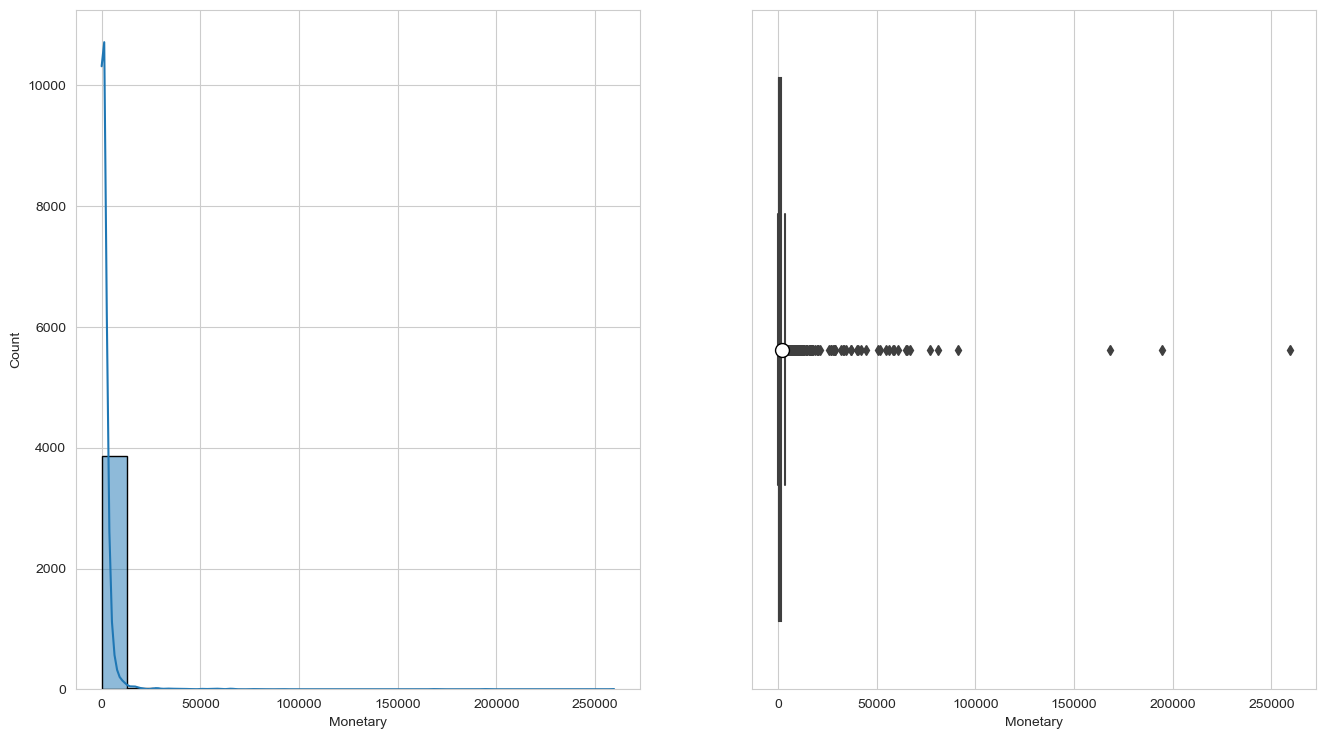

In [55]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
sns.histplot(data = monetary, x="Monetary", bins=20, edgecolor="black", kde=True, ax = ax[0]);
sns.boxplot(data=monetary, 
            x="Monetary",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, ax = ax[1]);

### vi. Create RFM Table

In [56]:
df_rfm = recency.merge(frequency, on='CustomerID')
df_rfm = df_rfm.merge(monetary, on='CustomerID')
df_rfm

CustomerID  Recency  Frequency  Monetary
0          12346      325          1 77183.600
1          12747        2         11  4196.010
2          12748        0        209 33053.190
3          12749        3          5  4090.880
4          12820        3          4   942.340
...          ...      ...        ...       ...
3915       18280      277          1   180.600
3916       18281      180          1    80.820
3917       18282        7          2   178.050
3918       18283        3         16  2045.530
3919       18287       42          3  1837.280

[3920 rows x 4 columns]

# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

In [57]:
df_rfm.head()

CustomerID  Recency  Frequency  Monetary
0       12346      325          1 77183.600
1       12747        2         11  4196.010
2       12748        0        209 33053.190
3       12749        3          5  4090.880
4       12820        3          4   942.340

In [58]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   int32  
 1   Recency     3920 non-null   int32  
 2   Frequency   3920 non-null   int64  
 3   Monetary    3920 non-null   float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 122.5 KB


In [59]:
df_rfm.describe().T

count      mean      std       min       25%       50%  \
CustomerID 3920.000 15562.060 1576.595 12346.000 14208.750 15569.500   
Recency    3920.000    91.742   99.533     0.000    17.000    50.000   
Frequency  3920.000     4.246    7.199     1.000     1.000     2.000   
Monetary   3920.000  1858.425 7478.631     3.750   298.185   644.975   

                 75%        max  
CustomerID 16913.250  18287.000  
Recency      142.000    373.000  
Frequency      5.000    209.000  
Monetary    1571.285 259657.300

In [60]:
quantiles = df_rfm.iloc[:,1:].quantile(q=[0.25,0.5,0.75])
quantiles

Recency  Frequency  Monetary
0.250   17.000      1.000   298.185
0.500   50.000      2.000   644.975
0.750  142.000      5.000  1571.285

### i. Creating the RFM Segmentation Table


1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [61]:
# pd.qcut(df_rfm["Recency"],4,[4,3,2,1])
# pd.qcut(df_rfm['Frequency'],4,[4,3,2,1])
# pd.qcut(df_rfm["Monetary"],4,[4,3,2,1])
df_rfm["R_Score"] = df_rfm["Recency"].apply(lambda x: 4 if x <= df_rfm["Recency"].quantile(0.25) else 3 if  x <= df_rfm["Recency"].quantile(0.5)
                        else 2 if  x <= df_rfm["Recency"].quantile(0.75) else 1)
df_rfm["F_Score"] = df_rfm["Frequency"].apply(lambda x: 1 if x <= df_rfm["Frequency"].quantile(0.25) else 2 if  x <= df_rfm["Frequency"].quantile(0.5)
                        else 3 if  x <= df_rfm["Frequency"].quantile(0.75) else 4)
df_rfm["M_Score"] = df_rfm["Monetary"].apply(lambda x: 1 if x <= df_rfm["Monetary"].quantile(0.25) else 2 if  x <= df_rfm["Monetary"].quantile(0.5)
                        else 3 if  x <= df_rfm["Monetary"].quantile(0.75) else 4)
df_rfm

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score
0          12346      325          1 77183.600        1        1        4
1          12747        2         11  4196.010        4        4        4
2          12748        0        209 33053.190        4        4        4
3          12749        3          5  4090.880        4        3        4
4          12820        3          4   942.340        4        3        3
...          ...      ...        ...       ...      ...      ...      ...
3915       18280      277          1   180.600        1        1        1
3916       18281      180          1    80.820        1        1        1
3917       18282        7          2   178.050        4        2        1
3918       18283        3         16  2045.530        4        4        4
3919       18287       42          3  1837.280        3        3        4

[3920 rows x 7 columns]

In [62]:
df_rfm["RFM_Score"] = df_rfm["R_Score"].map(str)+df_rfm["F_Score"].map(str)+df_rfm["M_Score"].map(str)
df_rfm["RFM_Score2"] = df_rfm["R_Score"]+df_rfm["F_Score"]+df_rfm["M_Score"]
df_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0       12346      325          1 77183.600        1        1        4   
1       12747        2         11  4196.010        4        4        4   
2       12748        0        209 33053.190        4        4        4   
3       12749        3          5  4090.880        4        3        4   
4       12820        3          4   942.340        4        3        3   

  RFM_Score  RFM_Score2  
0       114           6  
1       444          12  
2       444          12  
3       434          11  
4       433          10

<AxesSubplot:xlabel='RFM_Score', ylabel='count'>

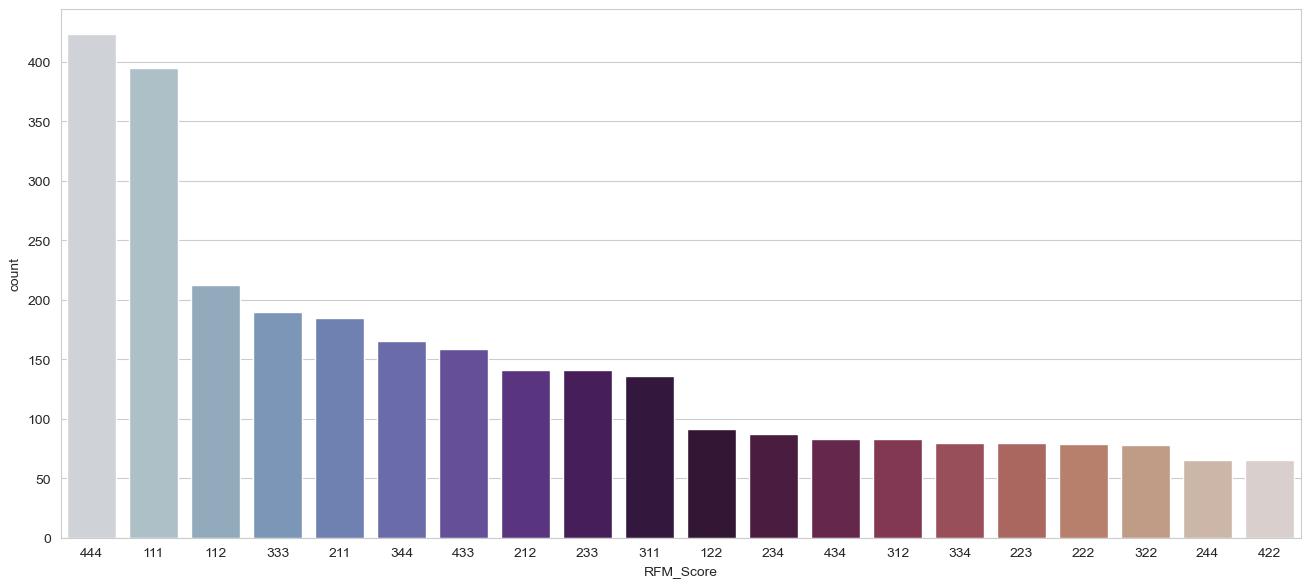

In [63]:
plt.figure(figsize=(16,7))
sns.countplot(data=df_rfm, x='RFM_Score', order=df_rfm.RFM_Score.value_counts()[:20].index, palette='twilight')

<AxesSubplot:xlabel='RFM_Score2', ylabel='count'>

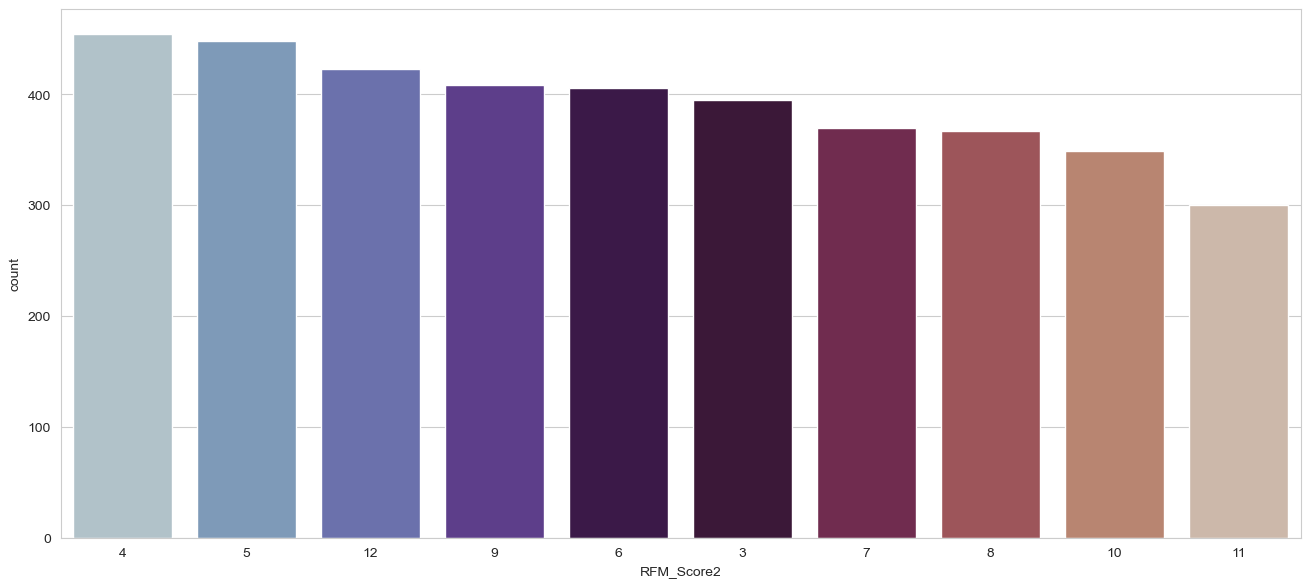

In [64]:
plt.figure(figsize=(16,7))
sns.countplot(data=df_rfm, x='RFM_Score2', order=df_rfm.RFM_Score2.value_counts().index, palette='twilight')

4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [65]:
# Define rfm_level

# segment5 = 
# Best_Customers, who bought most recently, most often, and are heavy spenders.            
# Loyal_Customers customers with high frequency, high recency and average monetary.
# New Customers are your customers high recency, no frequency average monetary
# High_Spend_Customer heacy spender but no frequency and no recency                      
# At Risk Customers are your customers spent average amounts, but haven’t purchased recently and not frequently.

def rfm_level5(RFM) :
    if (RFM[0] in ["3","4"]) and (RFM[1] == "4") and (RFM[2] in ["3", "4"]):
        return "Best_Customers"
    elif  (RFM[0] in ["3","4"]) and (RFM[1] in ["3", "4"]) and (RFM[2] in ["1","2","3", "4"]):
        return "Loyal_Customers"
    elif  (RFM[0] in ["3","4"]) and (RFM[1] in ["1", "2"])and (RFM[2] in ["1","2","3", "4"]):
        return "New_Customers"
    elif  (RFM[0] in ["1","2"]) and (RFM[1] in ["1", "2"]) and (RFM[2] in ["3", "4"]):        
        return "Need_Attention_Customer"
    else:
        return "At_Risk_Customers"

#segment4 
# Best_Customers, who bought most recently, most often, and are heavy spenders.              
# Loyal_Customers customers with high frequency, high recency and average monetary.
# New Customers are your customers high recency, no frequency average monetary
# At Risk Customers are your customers spent average amounts, but haven’t purchased recently and not frequently.

def rfm_level4(RFM) :
    if (RFM[0] in ["3","4"]) and (RFM[1] == "4") and (RFM[2] in ["3", "4"]):
        return "Best_Customers"
    elif  (RFM[0] in ["3","4"]) and (RFM[1] in ["3", "4"]) and (RFM[2] in ["1","2","3", "4"]):
        return "Loyal_Customers"
    elif  (RFM[0] in ["3","4"]) and (RFM[1] in ["1", "2"]) and (RFM[2] in ["1","2","3", "4"]):
        return "New_Customers"
    else:
        return "At_Risk_Customers"

5. Calculate average values for each RFM_Level, and return a size of each segment 

In [66]:
df_rfm["Segment5"] = df_rfm["RFM_Score"].apply(rfm_level5)
df_rfm["Segment4"] = df_rfm["RFM_Score"].apply(rfm_level4)
df_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0       12346      325          1 77183.600        1        1        4   
1       12747        2         11  4196.010        4        4        4   
2       12748        0        209 33053.190        4        4        4   
3       12749        3          5  4090.880        4        3        4   
4       12820        3          4   942.340        4        3        3   

  RFM_Score  RFM_Score2                 Segment5           Segment4  
0       114           6  Need_Attention_Customer  At_Risk_Customers  
1       444          12           Best_Customers     Best_Customers  
2       444          12           Best_Customers     Best_Customers  
3       434          11          Loyal_Customers    Loyal_Customers  
4       433          10          Loyal_Customers    Loyal_Customers

In [67]:
df_rfm.groupby('Segment5').agg({'Recency':["max","min",'mean'], 'Frequency':["max","min",'mean'], 'Monetary':["max","min",'mean','size']}).T

Segment5        At_Risk_Customers  Best_Customers  Loyal_Customers  \
Recency   max             373.000          50.000           50.000   
          min              51.000           0.000            0.000   
          mean            168.050          13.751           20.439   
Frequency max              34.000         209.000            7.000   
          min               1.000           6.000            3.000   
          mean              2.225          13.301            3.865   
Monetary  max           44534.300      259657.300        12393.700   
          min               3.750         716.000           36.560   
          mean            703.659        6555.720         1302.944   
          size           1710.000         678.000          631.000   

Segment5        Need_Attention_Customer  New_Customers  
Recency   max                   372.000         50.000  
          min                    51.000          0.000  
          mean                  142.597         24.293  
Frequency max                     2.000          2.000  
          min                     1.000          1.000  
          mean                    1.622          1.507  
Monetary  max                 77183.600     168472.500  
          min                   645.650          6.900  
          mean                 1425.571        717.264  
          size                  238.000        663.000

In [68]:
df_rfm.groupby('Segment4').agg({'Recency':["max","min",'mean'], 'Frequency':["max","min",'mean'], 'Monetary':["max","min",'mean','size']}).T

Segment4        At_Risk_Customers  Best_Customers  Loyal_Customers  \
Recency   max             373.000          50.000           50.000   
          min              51.000           0.000            0.000   
          mean            164.940          13.751           20.439   
Frequency max              34.000         209.000            7.000   
          min               1.000           6.000            3.000   
          mean              2.151          13.301            3.865   
Monetary  max           77183.600      259657.300        12393.700   
          min               3.750         716.000           36.560   
          mean            791.860        6555.720         1302.944   
          size           1948.000         678.000          631.000   

Segment4        New_Customers  
Recency   max          50.000  
          min           0.000  
          mean         24.293  
Frequency max           2.000  
          min           1.000  
          mean          1.507  
Monetary  max      168472.500  
          min           6.900  
          mean        717.264  
          size        663.000

## Plot RFM Segments

1. Create your plot and resize it.

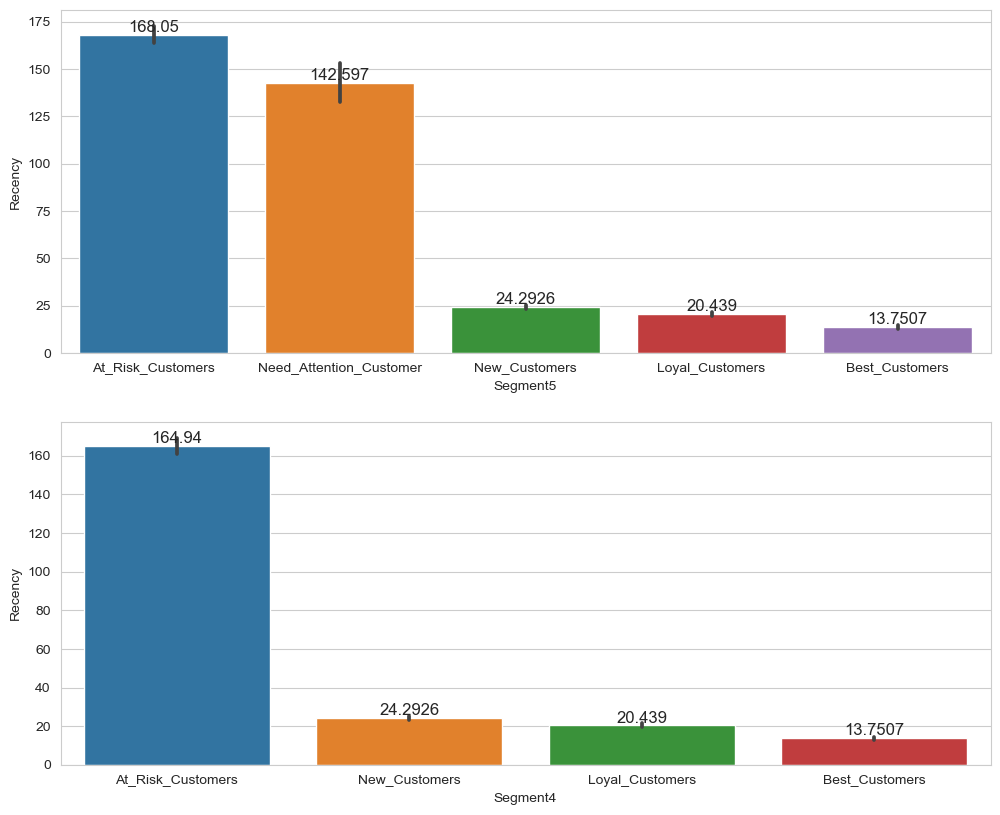

In [69]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
sns.barplot(data = df_rfm.sort_values(by="Recency", ascending=False), x= "Segment5", y= "Recency", ax=ax[0]);
ax[0].bar_label(ax[0].containers[0], fontsize=12);
sns.barplot(data = df_rfm.sort_values(by="Recency", ascending=False), x= "Segment4", y= "Recency", ax=ax[1]);
ax[1].bar_label(ax[1].containers[0], fontsize=12);

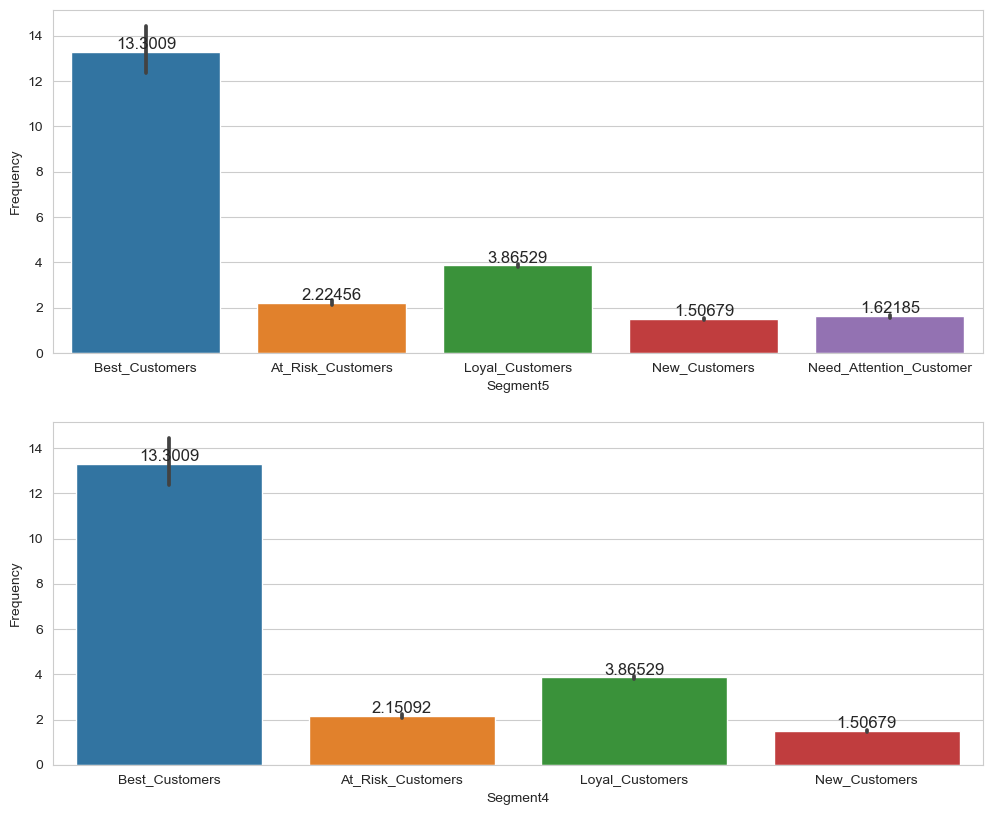

In [70]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
sns.barplot(data = df_rfm.sort_values(by="Frequency", ascending=False), x= "Segment5", y= "Frequency", ax=ax[0]);
ax[0].bar_label(ax[0].containers[0], fontsize=12);
sns.barplot(data = df_rfm.sort_values(by="Frequency", ascending=False), x= "Segment4", y= "Frequency", ax=ax[1]);
ax[1].bar_label(ax[1].containers[0], fontsize=12);

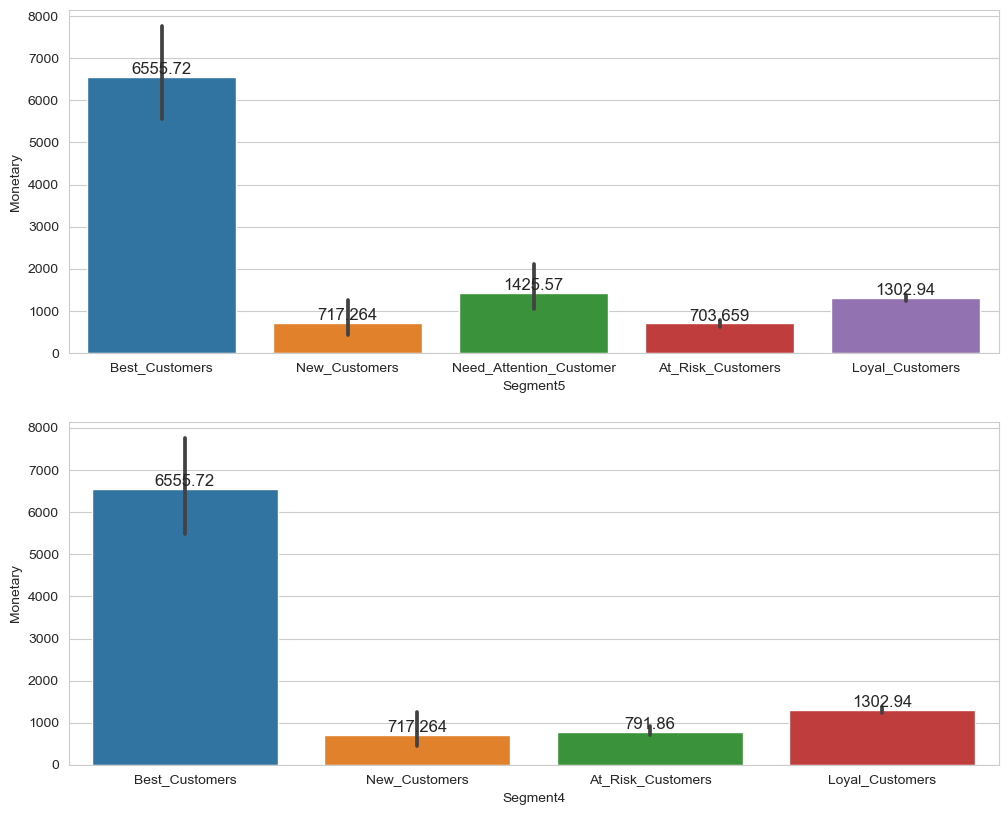

In [71]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
sns.barplot(data = df_rfm.sort_values(by="Monetary", ascending=False), x= "Segment5", y= "Monetary", ax=ax[0]);
ax[0].bar_label(ax[0].containers[0], fontsize=12);
sns.barplot(data = df_rfm.sort_values(by="Monetary", ascending=False), x= "Segment4", y= "Monetary", ax=ax[1]);
ax[1].bar_label(ax[1].containers[0], fontsize=12);

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales). We can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [72]:
rfm_plot_5 = pd.DataFrame(df_rfm['Segment5'].value_counts().sort_values(ascending=False).reset_index().rename(columns=
                                                        {'index':'Segment', 'Segment5':'Num_Customers'}))
rfm_plot_5

Segment  Num_Customers
0        At_Risk_Customers           1710
1           Best_Customers            678
2            New_Customers            663
3          Loyal_Customers            631
4  Need_Attention_Customer            238

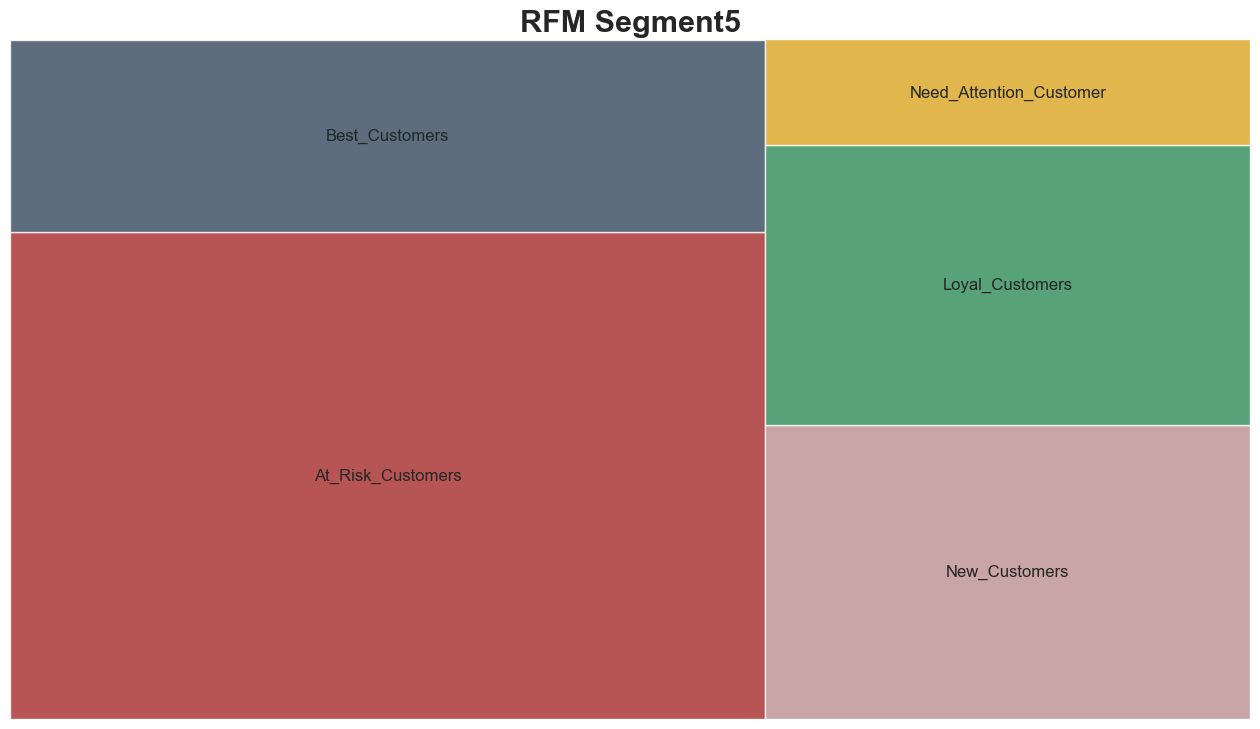

In [73]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=list(rfm_plot_5['Num_Customers'].values), 
              label=list(rfm_plot_5['Segment'].values), alpha=0.8,
              text_kwargs={'fontsize':12},color = ['brown', '#34495E', 'rosybrown', 'seagreen', 'goldenrod', 'steelblue'])
plt.title("RFM Segment5",fontsize=22,fontweight="bold")
plt.axis('off')
plt.show()

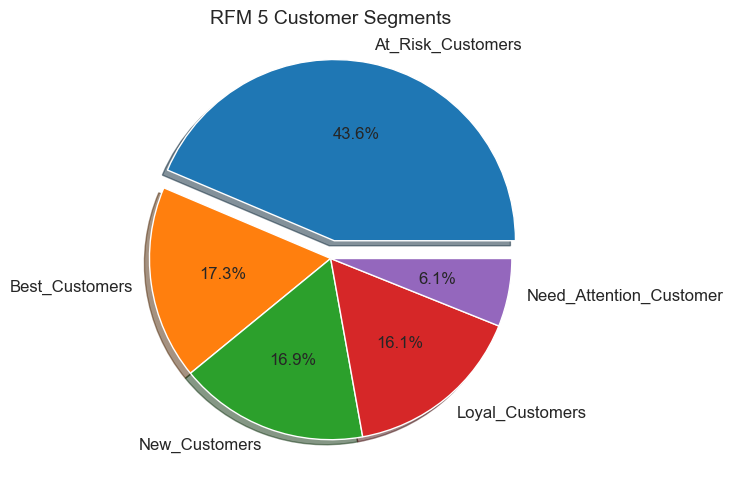

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df_rfm["Segment5"].value_counts().values, 
       labels=df_rfm["Segment5"].value_counts().index, 
       autopct='%.1f%%',
       explode=[0.1,0,0,0,0],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("RFM 5 Customer Segments", fontdict = {'fontsize': 14})
plt.show()

In [75]:
rfm_plot_4 = pd.DataFrame(df_rfm['Segment4'].value_counts().sort_values(ascending=False).reset_index().rename(columns=
                                                        {'index':'Segment', 'Segment4':'Num_Customers'}))
rfm_plot_4

Segment  Num_Customers
0  At_Risk_Customers           1948
1     Best_Customers            678
2      New_Customers            663
3    Loyal_Customers            631

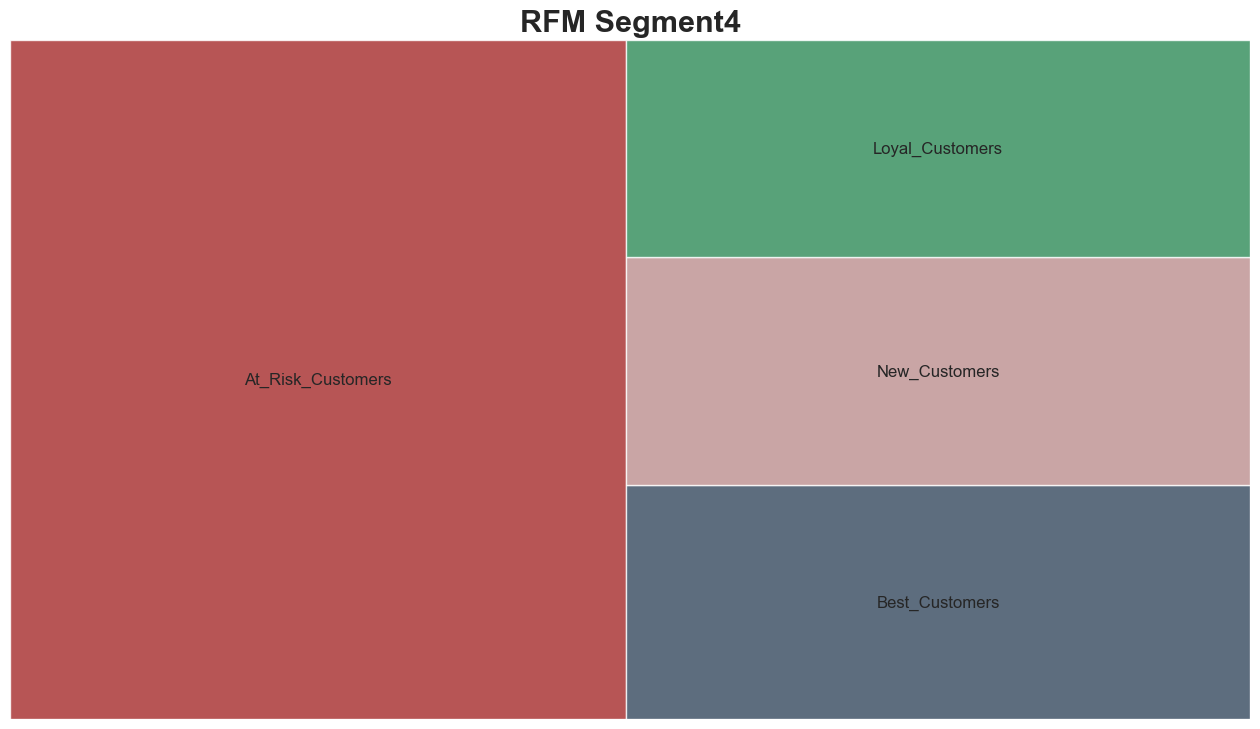

In [76]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=list(rfm_plot_4['Num_Customers'].values), 
              label=list(rfm_plot_4['Segment'].values), alpha=0.8,
              text_kwargs={'fontsize':12},color = ['brown', '#34495E', 'rosybrown', 'seagreen', 'goldenrod', 'steelblue'])
plt.title("RFM Segment4",fontsize=22,fontweight="bold")
plt.axis('off')
plt.show()

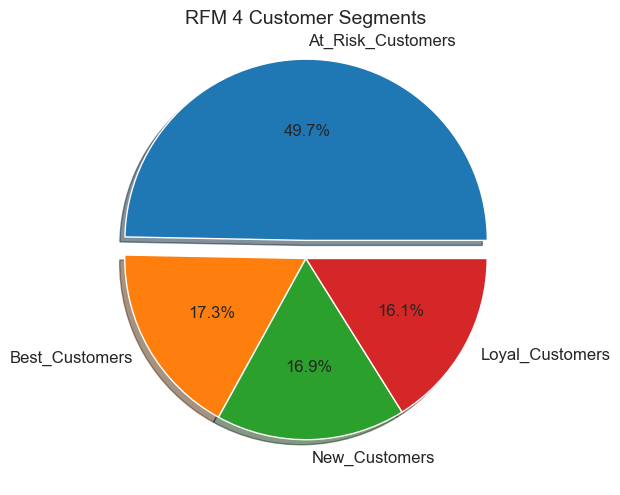

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df_rfm["Segment4"].value_counts().values, 
       labels=df_rfm["Segment4"].value_counts().index, 
       autopct='%.1f%%',
       explode=[0.1,0,0,0],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("RFM 4 Customer Segments", fontdict = {'fontsize': 14})
plt.show()

# 3. Applying K-Means Clustering

Now that we have our customers segmented into different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [78]:
df_rfm

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0          12346      325          1 77183.600        1        1        4   
1          12747        2         11  4196.010        4        4        4   
2          12748        0        209 33053.190        4        4        4   
3          12749        3          5  4090.880        4        3        4   
4          12820        3          4   942.340        4        3        3   
...          ...      ...        ...       ...      ...      ...      ...   
3915       18280      277          1   180.600        1        1        1   
3916       18281      180          1    80.820        1        1        1   
3917       18282        7          2   178.050        4        2        1   
3918       18283        3         16  2045.530        4        4        4   
3919       18287       42          3  1837.280        3        3        4   

     RFM_Score  RFM_Score2                 Segment5           Segment4  
0          114           6  Need_Attention_Customer  At_Risk_Customers  
1          444          12           Best_Customers     Best_Customers  
2          444          12           Best_Customers     Best_Customers  
3          434          11          Loyal_Customers    Loyal_Customers  
4          433          10          Loyal_Customers    Loyal_Customers  
...        ...         ...                      ...                ...  
3915       111           3        At_Risk_Customers  At_Risk_Customers  
3916       111           3        At_Risk_Customers  At_Risk_Customers  
3917       421           7            New_Customers      New_Customers  
3918       444          12           Best_Customers     Best_Customers  
3919       334          10          Loyal_Customers    Loyal_Customers  

[3920 rows x 11 columns]

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

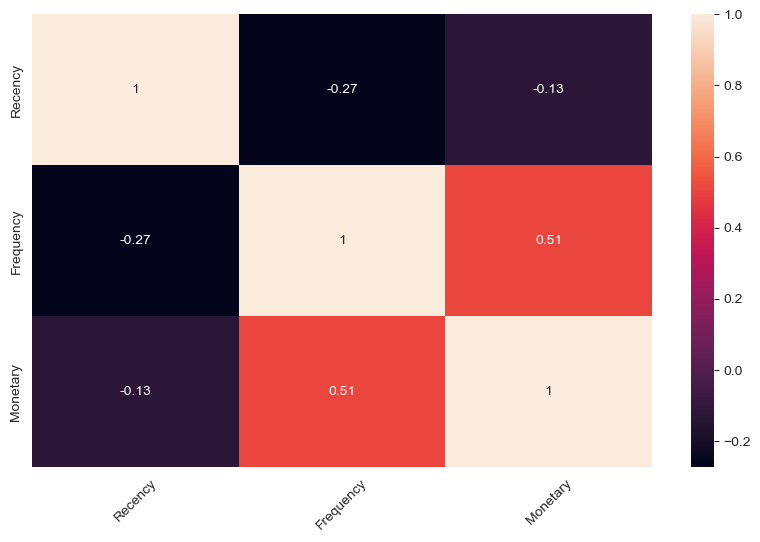

In [79]:
rfm = df_rfm[["Recency","Frequency","Monetary"]]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(rfm.corr(), annot=True)
plt.xticks(rotation=45);

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

<Figure size 2000x2000 with 0 Axes>

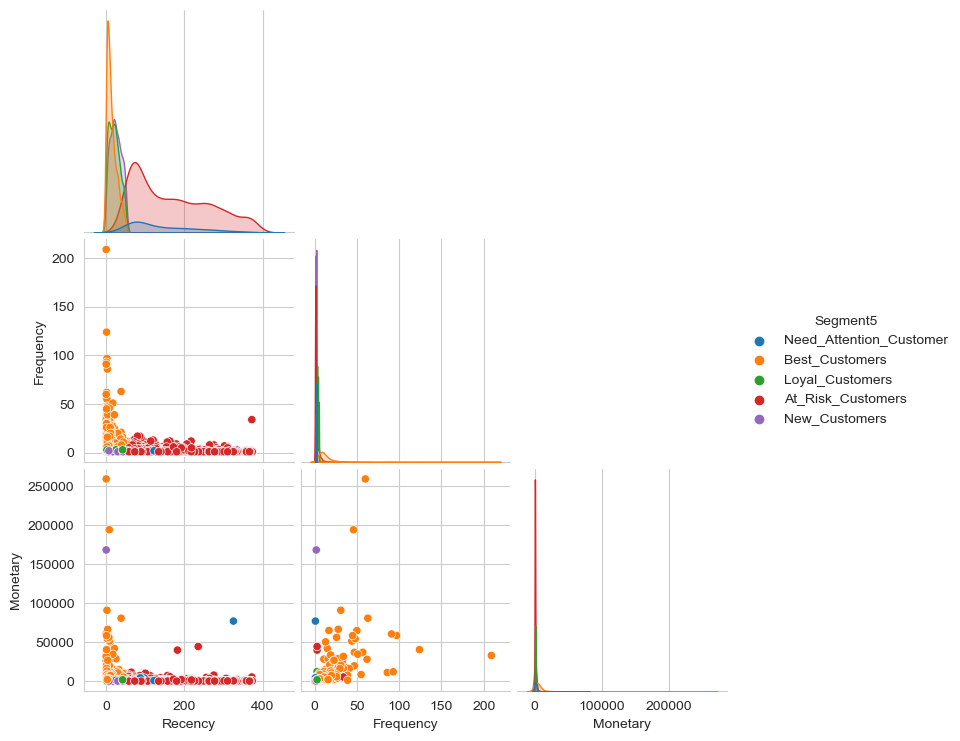

In [80]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_rfm[['Recency', 'Frequency', 'Monetary',"Segment5"]], hue='Segment5', corner=True);

<Figure size 2000x2000 with 0 Axes>

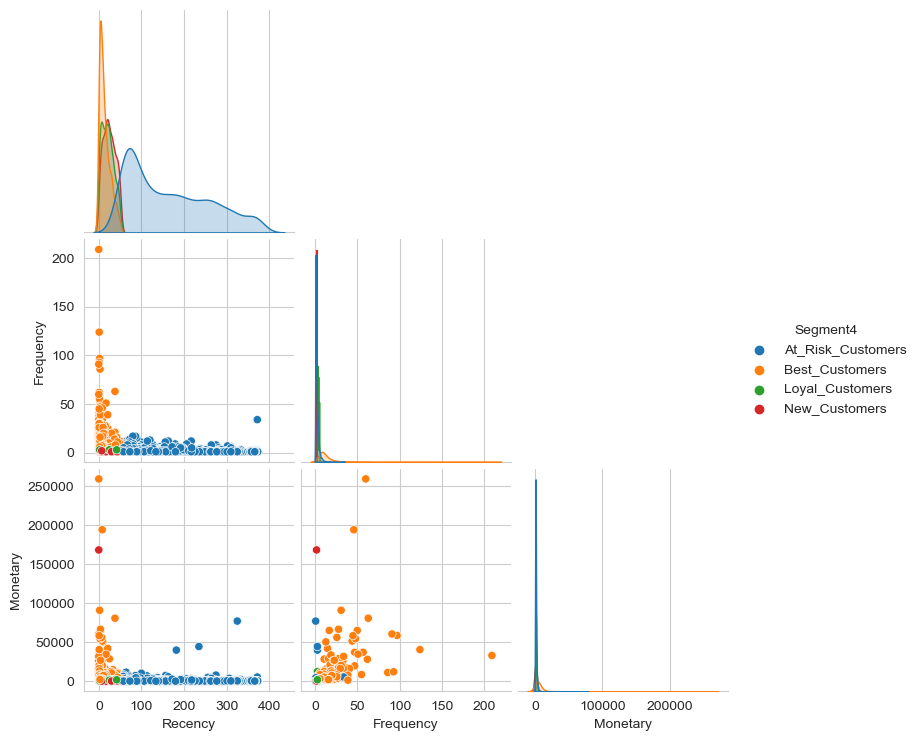

In [81]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_rfm[['Recency', 'Frequency', 'Monetary',"Segment4"]], hue='Segment4', corner=True);

### iii. Data Normalization

1. Logarithmic Tranformation can be used to normalize the values in a column.
2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

In [82]:
df_rfm["log_r"] = np.log(df_rfm.Recency+1)
df_rfm["log_f"] = np.log(df_rfm.Frequency+1)
df_rfm["log_m"] = np.log(df_rfm.Monetary+1)
df_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0       12346      325          1 77183.600        1        1        4   
1       12747        2         11  4196.010        4        4        4   
2       12748        0        209 33053.190        4        4        4   
3       12749        3          5  4090.880        4        3        4   
4       12820        3          4   942.340        4        3        3   

  RFM_Score  RFM_Score2                 Segment5           Segment4  log_r  \
0       114           6  Need_Attention_Customer  At_Risk_Customers  5.787   
1       444          12           Best_Customers     Best_Customers  1.099   
2       444          12           Best_Customers     Best_Customers  0.000   
3       434          11          Loyal_Customers    Loyal_Customers  1.386   
4       433          10          Loyal_Customers    Loyal_Customers  1.386   

   log_f  log_m  
0  0.693 11.254  
1  2.485  8.342  
2  5.347 10.406  
3  1.792  8.317  
4  1.609  6.849

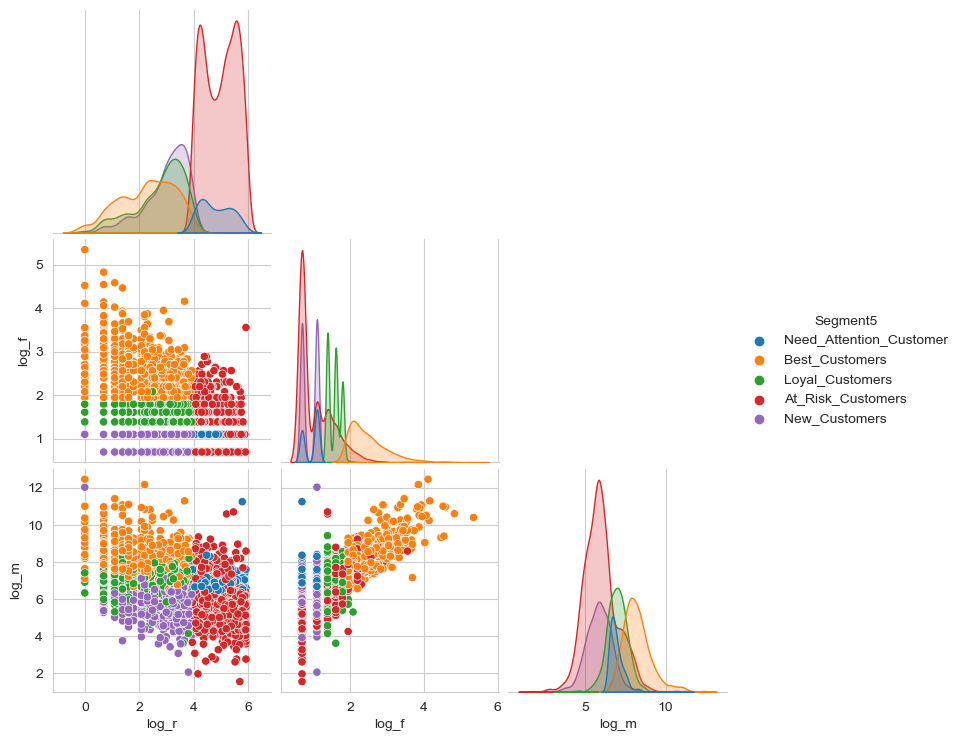

In [83]:
sns.pairplot(df_rfm.iloc[:,9:], diag_kind='kde', hue='Segment5', corner=True);

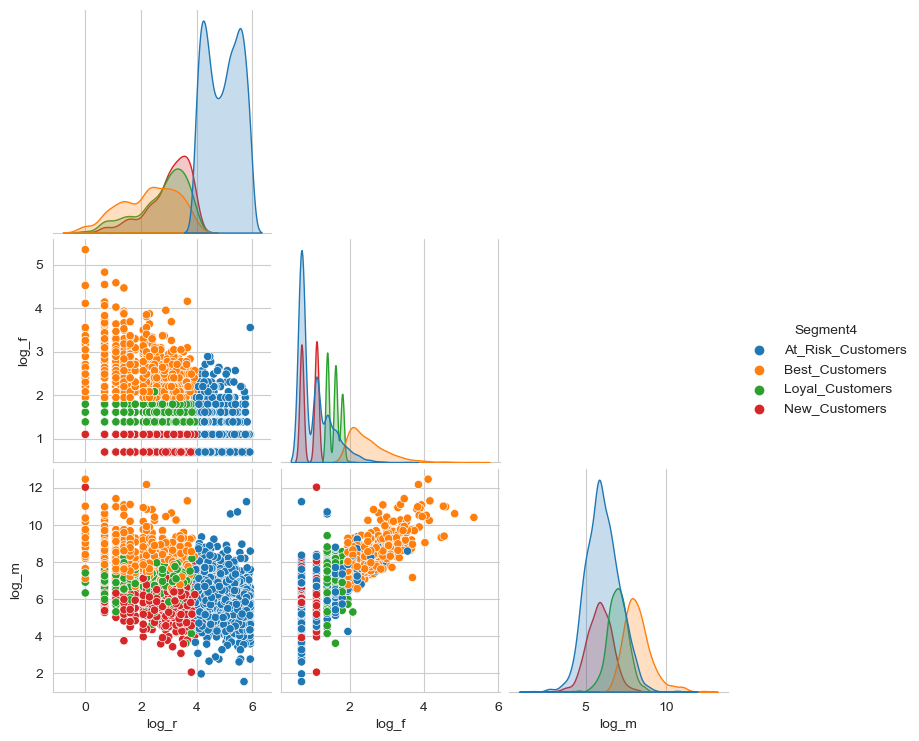

In [84]:
sns.pairplot(df_rfm.iloc[:,9:], diag_kind='kde', hue='Segment4', corner=True);

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>


In [85]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins

X = df_rfm[["log_r","log_f","log_m"]]
X.head()

log_r  log_f  log_m
0  5.787  0.693 11.254
1  1.099  2.485  8.342
2  0.000  5.347 10.406
3  1.386  1.792  8.317
4  1.386  1.609  6.849

In [86]:
hopkins(X, X.shape[0])

0.0669105262486547

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

Text(0.5, 1.0, 'elbow method')

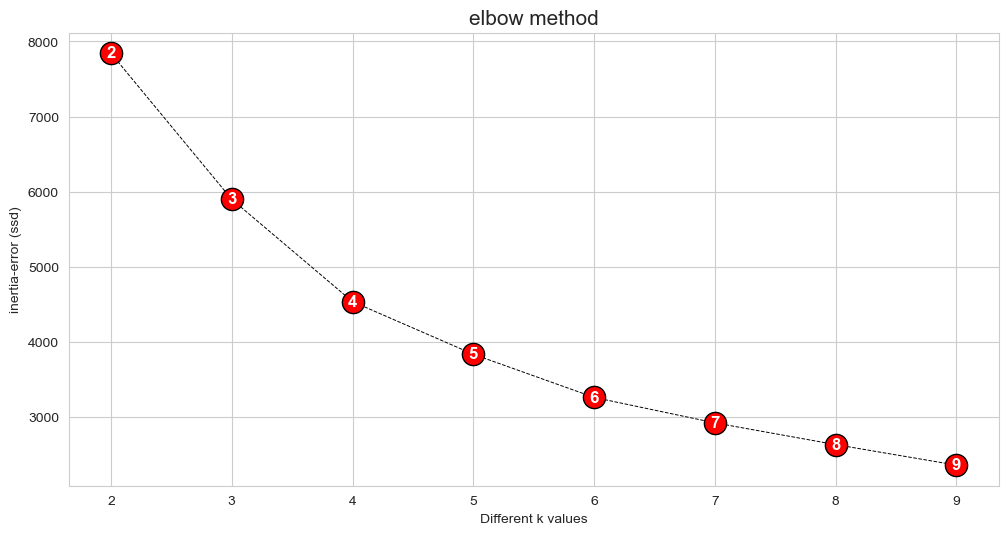

In [87]:
ssd = [] #sum squared distance
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")


<AxesSubplot:>

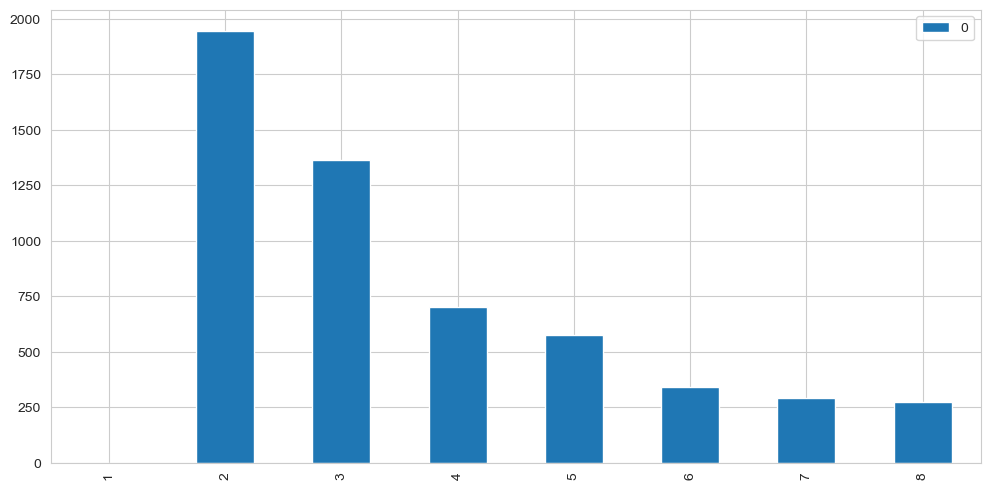

In [88]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar')

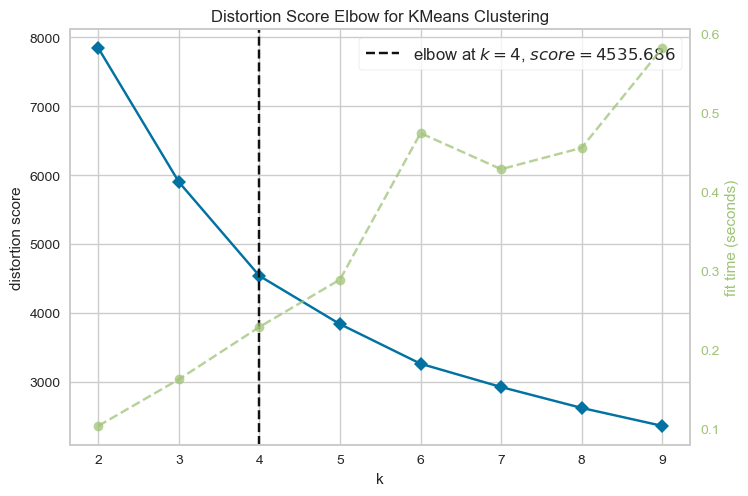

In [89]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X)      
visualizer.show();

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [90]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.419639968951785
For n_clusters=3, the silhouette score is 0.3350248711582346
For n_clusters=4, the silhouette score is 0.3527309821071799
For n_clusters=5, the silhouette score is 0.3381754438912514
For n_clusters=6, the silhouette score is 0.3271640786627668
For n_clusters=7, the silhouette score is 0.31701860935908066
For n_clusters=8, the silhouette score is 0.321183462405093
For n_clusters=9, the silhouette score is 0.31287901509815597


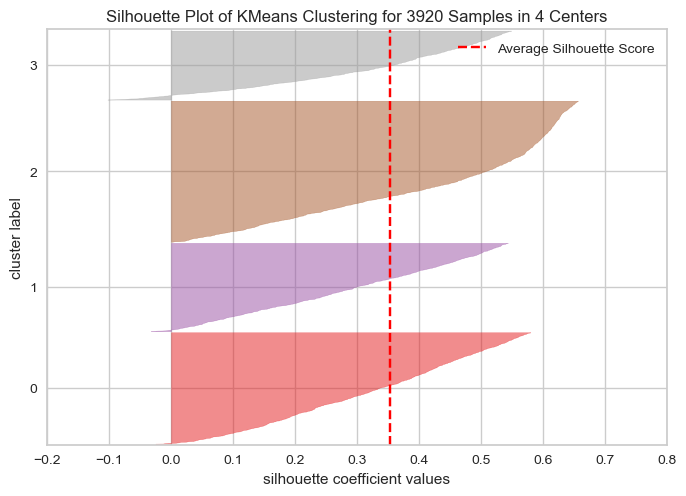

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### ii. Model Fitting

In [92]:
model4 = KMeans(n_clusters = 4, random_state=101)
model4.fit_predict(X)

array([0, 3, 3, ..., 1, 3, 0])

In [93]:
df_rfm["Kmean_4"] = model4.labels_
X["Kmean_4"] = model4.labels_
X["Segment4"] = df_rfm["Segment4"]
X.Segment4 = X.Segment4.map({'Best_Customers':0,'Loyal_Customers':1,"New_Customers":2,"At_Risk_Customers":3})

In [94]:
model5 = KMeans(n_clusters = 5, random_state=101)
model5.fit_predict(X)

array([3, 4, 4, ..., 2, 4, 1])

In [95]:
df_rfm["Kmean_5"] = model5.labels_
X["Kmean_5"] = model5.labels_
X["Segment5"] = df_rfm["Segment5"]
X.Segment5 = X.Segment5.map({'Best_Customers':0,'Need_Attention_Customer':1,'Loyal_Customers':2,"New_Customers":3,"At_Risk_Customers":4})

In [96]:
df_rfm.sample(5)

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
2098       15754       51          3   458.570        2        3        2   
108        12968      112          1   135.950        2        1        1   
2334       16091      154          2   315.060        1        2        2   
8          12824       59          1   397.120        2        1        2   
3686       17964       31          2   463.210        3        2        2   

     RFM_Score  RFM_Score2           Segment5           Segment4  log_r  \
2098       232           7  At_Risk_Customers  At_Risk_Customers  3.951   
108        211           4  At_Risk_Customers  At_Risk_Customers  4.727   
2334       122           5  At_Risk_Customers  At_Risk_Customers  5.043   
8          212           5  At_Risk_Customers  At_Risk_Customers  4.094   
3686       322           7      New_Customers      New_Customers  3.466   

      log_f  log_m  Kmean_4  Kmean_5  
2098  1.386  6.130        1        3  
108   0.693  4.920        2        0  
2334  1.099  5.756        2        0  
8     0.693  5.987        2        0  
3686  1.099  6.140        1        2

In [97]:
pd.crosstab(df_rfm.Kmean_5, df_rfm.Segment5)

Segment5  At_Risk_Customers  Best_Customers  Loyal_Customers  \
Kmean_5                                                        
0                      1297               0                0   
1                         0             168              310   
2                         0               0              180   
3                       413               0                0   
4                         0             510              141   

Segment5  Need_Attention_Customer  New_Customers  
Kmean_5                                           
0                              90              3  
1                               0              7  
2                               0            597  
3                             148             47  
4                               0              9

In [98]:
pd.crosstab(df_rfm.Kmean_4, df_rfm.Segment4)

Segment4  At_Risk_Customers  Best_Customers  Loyal_Customers  New_Customers
Kmean_4                                                                    
0                       556             163              289             58
1                        46               5              201            593
2                      1346               0                0              3
3                         0             510              141              9

### iii. Visualize the Clusters

In [99]:
centers_4 = model4.cluster_centers_
centers_5 = model5.cluster_centers_

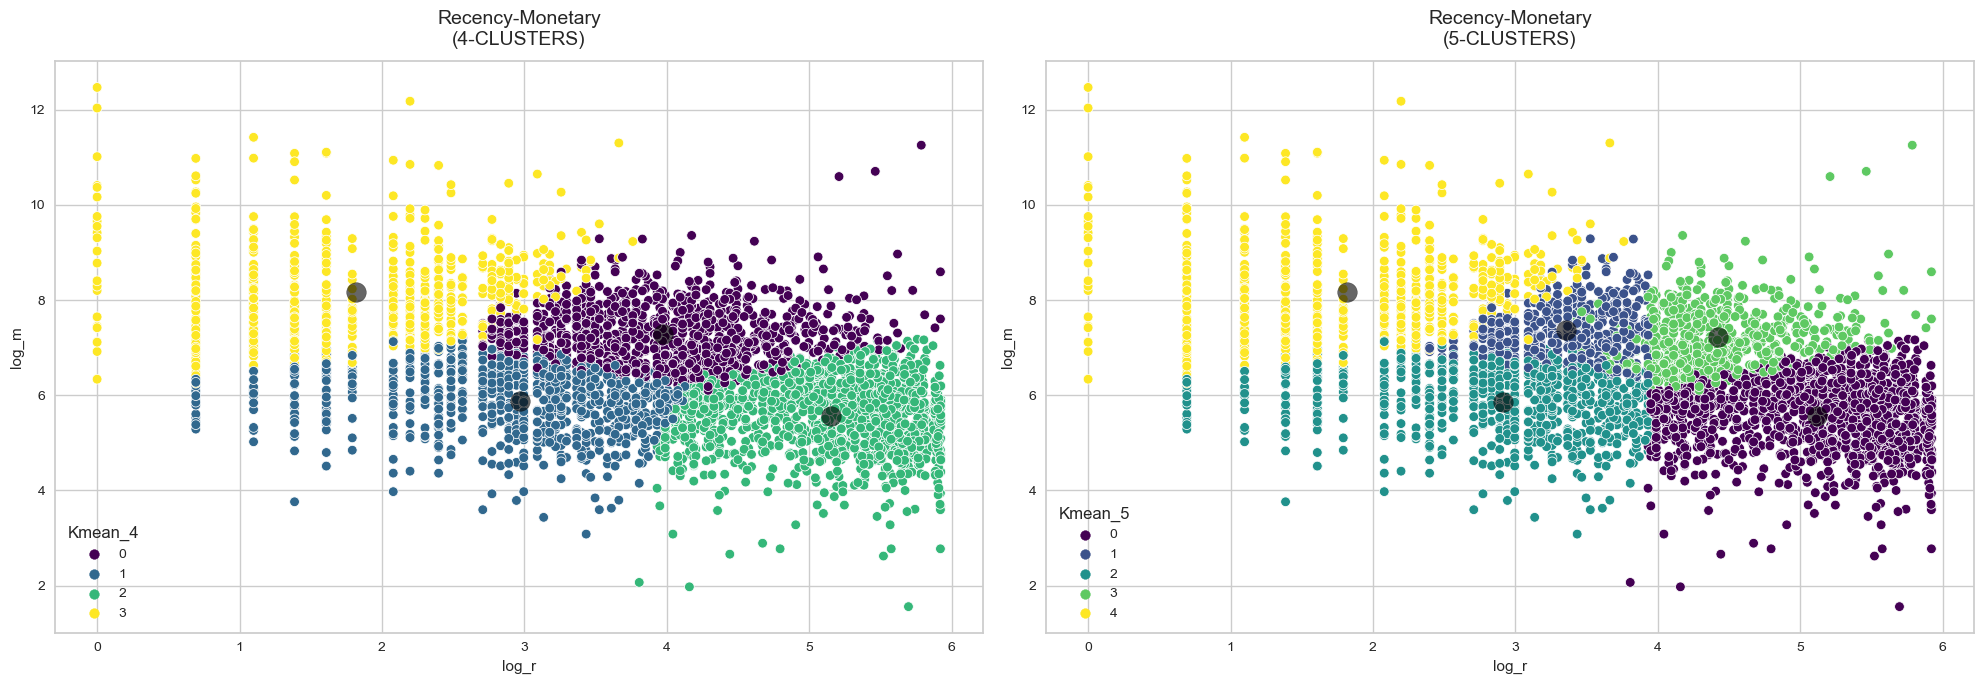

In [100]:
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.scatterplot(data=X, x='log_r', y='log_m', hue=X.Kmean_4, palette='viridis')
plt.scatter(centers_4[:, 0], centers_4[:, 2], c='black', s=200, alpha=0.6)
plt.title('Recency-Monetary\n(4-CLUSTERS)', size=14, pad=12)

plt.subplot(122)
sns.scatterplot(data=X, x='log_r', y='log_m', hue=X.Kmean_5, palette='viridis')
plt.scatter(centers_5[:, 0], centers_5[:, 2], c='black', s=200, alpha=0.6)
plt.title('Recency-Monetary\n(5-CLUSTERS)', size=14, pad=12)

plt.tight_layout();

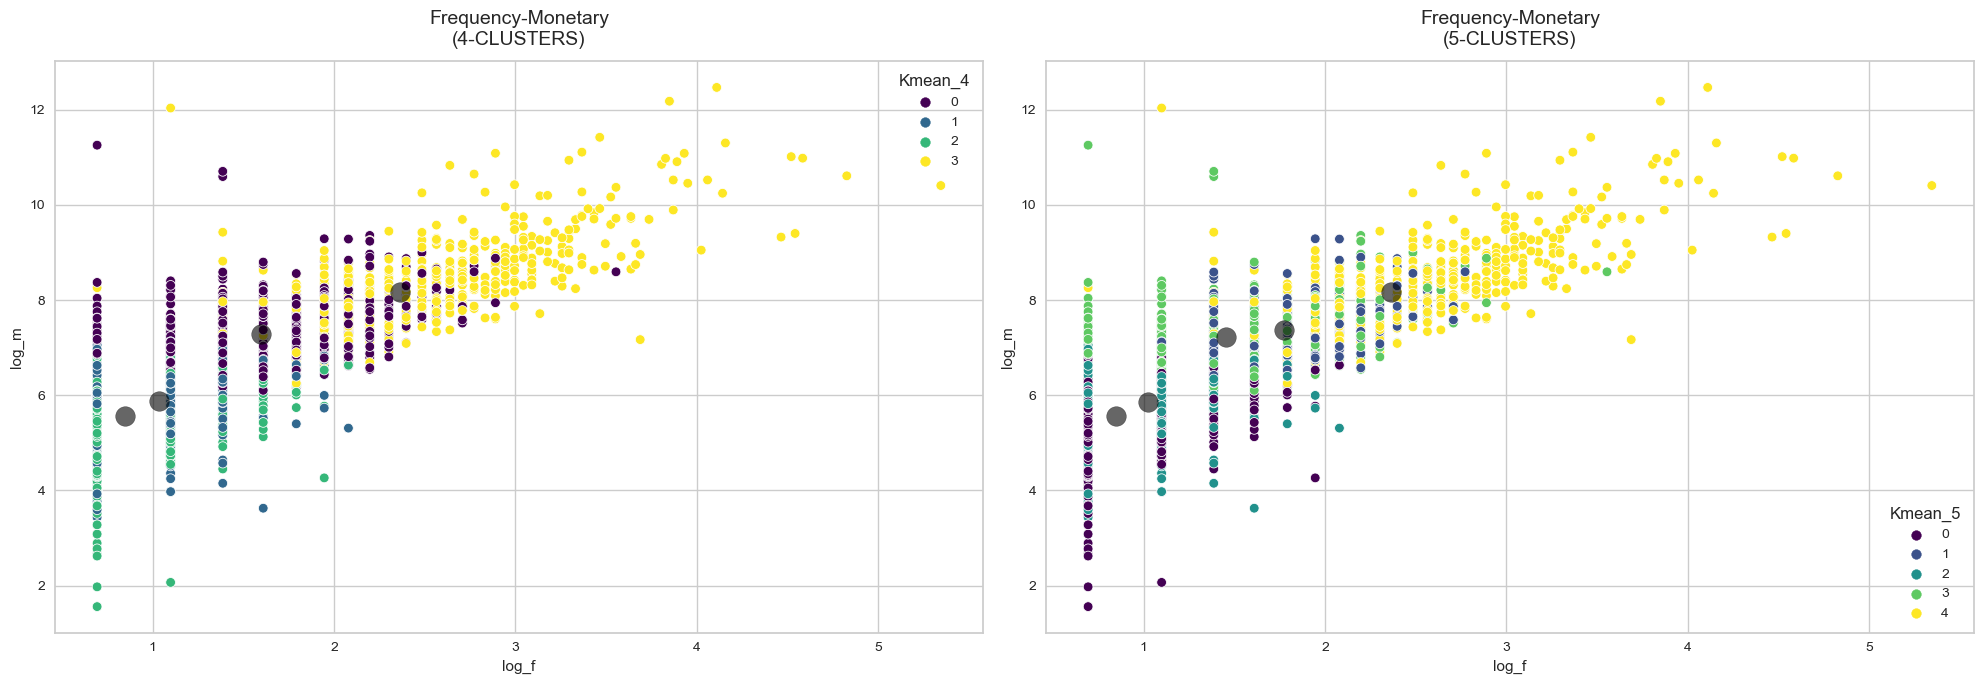

In [101]:
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.scatterplot(data=X, x='log_f', y='log_m', hue=X.Kmean_4, palette='viridis')
plt.scatter(centers_4[:, 1], centers_4[:, 2], c='black', s=200, alpha=0.6)
plt.title('Frequency-Monetary\n(4-CLUSTERS)', size=14, pad=12)

plt.subplot(122)
sns.scatterplot(data=X, x='log_f', y='log_m', hue=X.Kmean_5, palette='viridis')
plt.scatter(centers_5[:, 1], centers_5[:, 2], c='black', s=200, alpha=0.6)
plt.title('Frequency-Monetary\n(5-CLUSTERS)', size=14, pad=12)

plt.tight_layout();

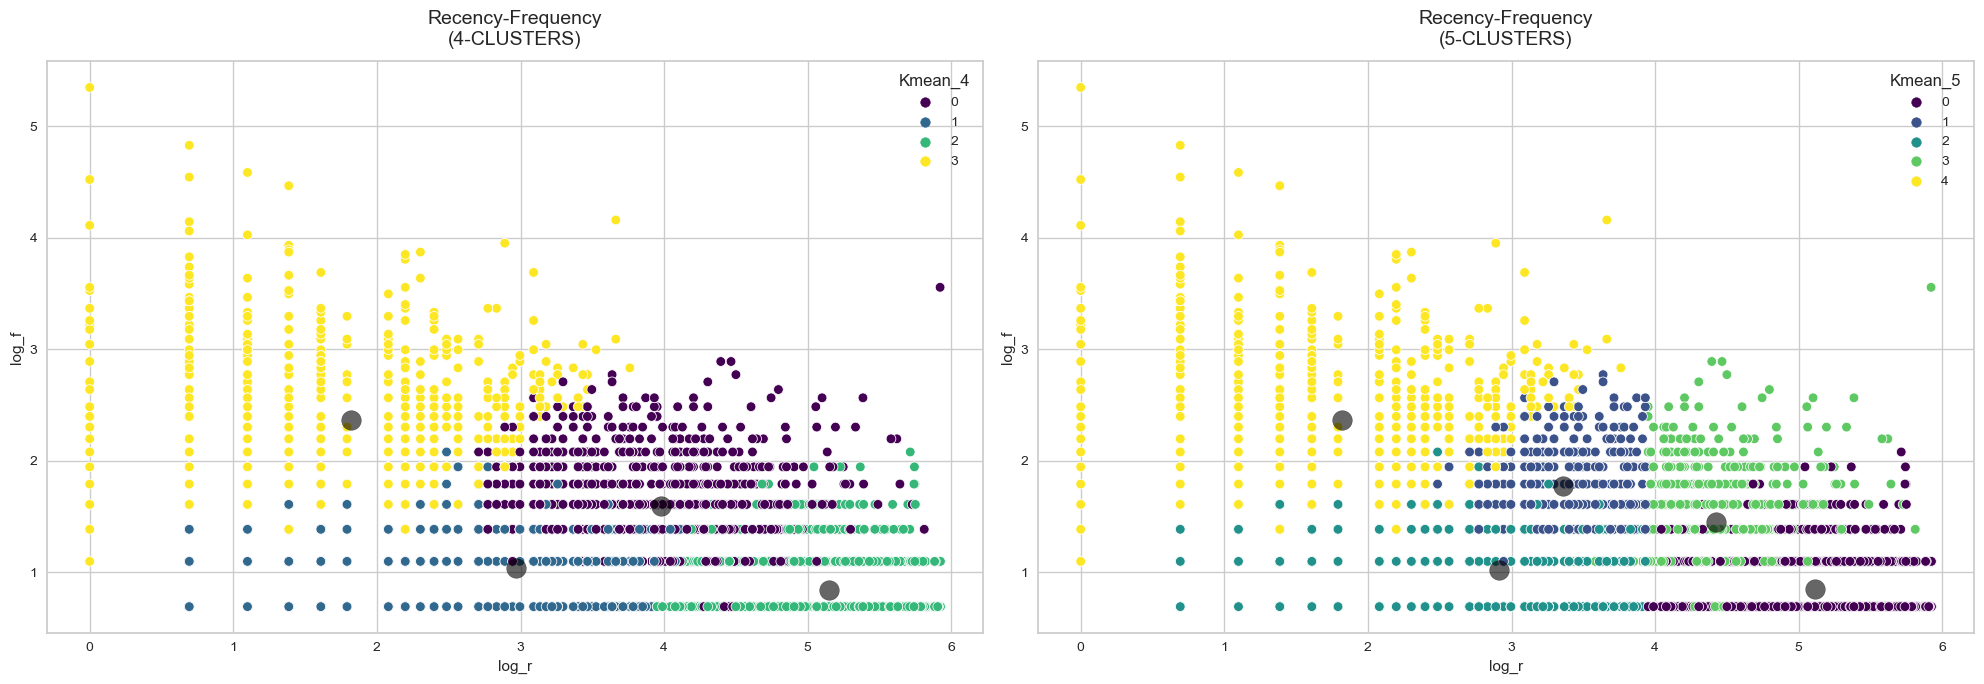

In [102]:
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.scatterplot(data=X, x='log_r', y='log_f', hue=X.Kmean_4, palette='viridis')
plt.scatter(centers_4[:, 0], centers_4[:, 1], c='black', s=200, alpha=0.6)
plt.title('Recency-Frequency\n(4-CLUSTERS)', size=14, pad=12)

plt.subplot(122)
sns.scatterplot(data=X, x='log_r', y='log_f', hue=X.Kmean_5, palette='viridis')
plt.scatter(centers_5[:, 0], centers_5[:, 1], c='black', s=200, alpha=0.6)
plt.title('Recency-Frequency\n(5-CLUSTERS)', size=14, pad=12)

plt.tight_layout();

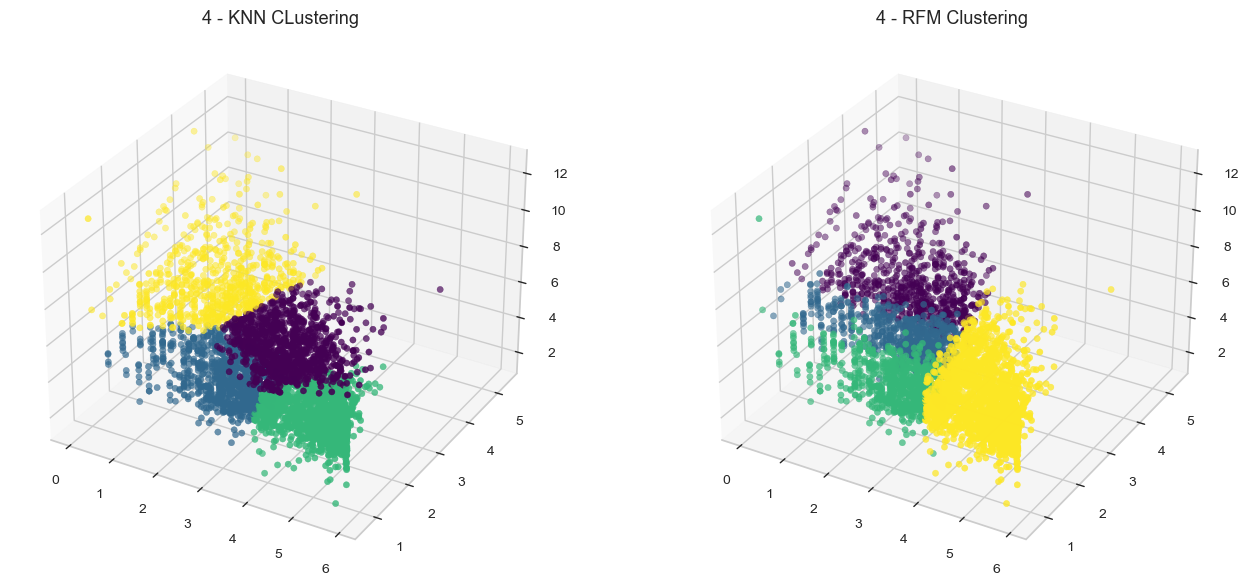

In [103]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X['log_r'], X['log_f'], X['log_m'],c=X.Kmean_4, cmap='viridis')
ax1.set_title('4 - KNN CLustering', fontsize=13)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X['log_r'], X['log_f'], X['log_m'],c=X.Segment4, cmap='viridis')
ax2.set_title('4 - RFM Clustering', fontsize=13)

plt.tight_layout();

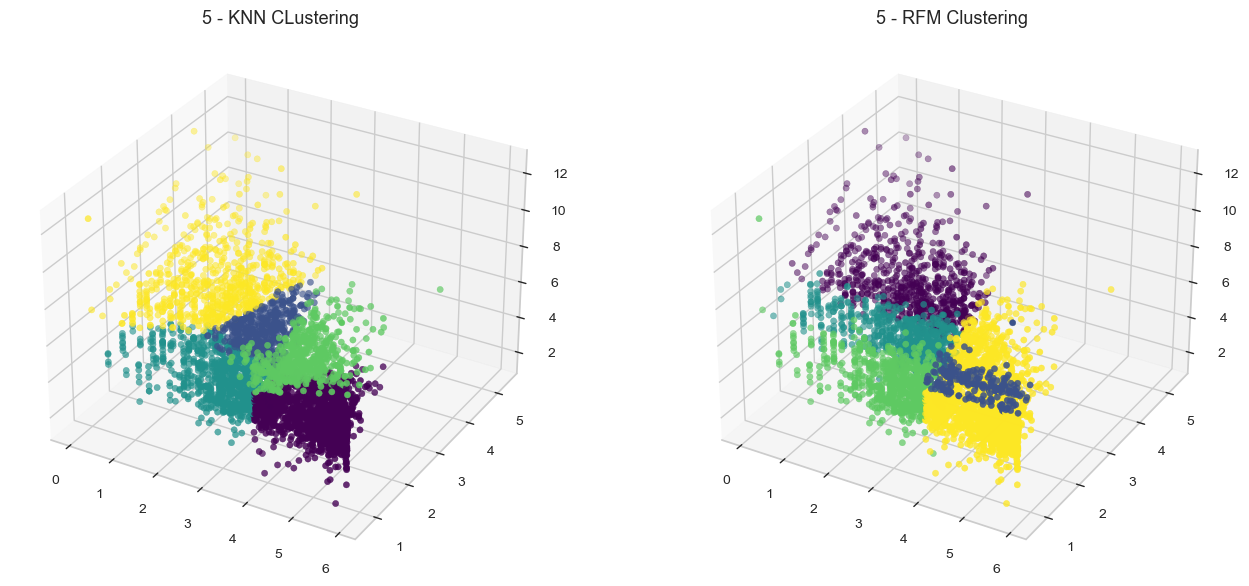

In [104]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X['log_r'], X['log_f'], X['log_m'],c=X.Kmean_5, cmap='viridis')
ax1.set_title('5 - KNN CLustering', fontsize=13)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X['log_r'], X['log_f'], X['log_m'],c=X.Segment5, cmap='viridis')
ax2.set_title('5 - RFM Clustering', fontsize=13)

plt.tight_layout();

### iv. Assign the Label

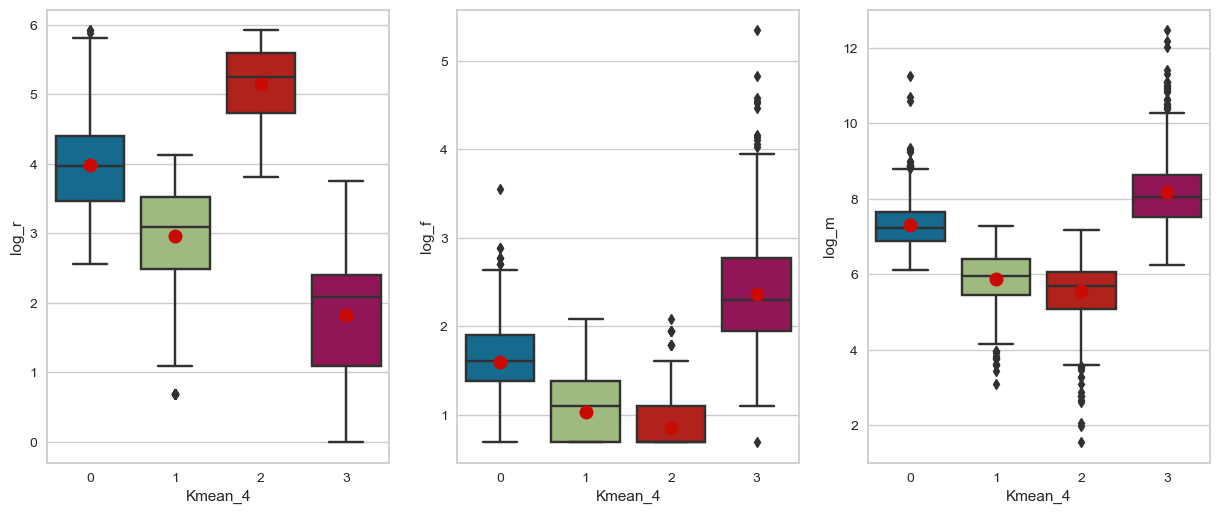

In [105]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.boxplot(X.Kmean_4, X.log_r)

plt.subplot(1, 3, 2)
sns.boxplot(X.Kmean_4, X.log_f)

plt.subplot(1, 3, 3)
sns.boxplot(X.Kmean_4, X.log_m)
plt.show()

In [106]:
df_rfm["Kmean_4"] = X.Kmean_4.map({0:"Loyal_Customer", 1:"New_Customer",2:"At_Risk_Customer", 3:"Best_Customers"})
df_rfm["Kmean_4"].value_counts()

At_Risk_Customer    1349
Loyal_Customer      1066
New_Customer         845
Best_Customers       660
Name: Kmean_4, dtype: int64

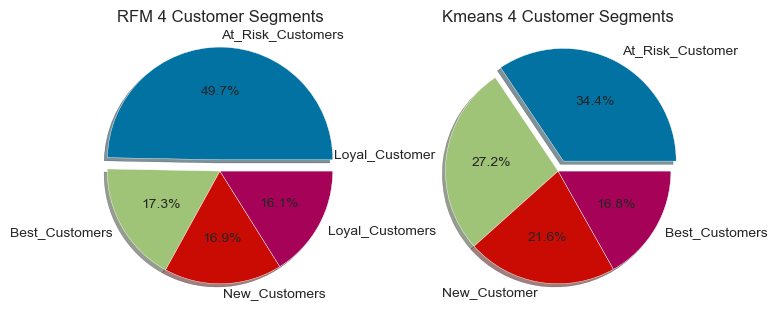

In [107]:
plt.subplot(1,2,1)
plt.pie(x=df_rfm["Segment4"].value_counts().values, 
       labels=df_rfm["Segment4"].value_counts().index, 
       autopct='%.1f%%',
       explode=[0.1,0,0,0],
       textprops={'fontsize': 10},
       shadow=True)
plt.title("RFM 4 Customer Segments", fontdict = {'fontsize': 12})

plt.subplot(1,2,2)
plt.pie(x=df_rfm["Kmean_4"].value_counts().values, 
       labels=df_rfm["Kmean_4"].value_counts().index, 
       autopct='%.1f%%',
       explode=[0.1,0,0,0],
       textprops={'fontsize': 10},
       shadow=True)
plt.title("Kmeans 4 Customer Segments", fontdict = {'fontsize': 12});

### v. Conclusion

As a result of our investigations, we see that there are differences between RFM and K-Means analyses. As a result of the 4 different grouping domains obtained by the K-means algorithm as a result of its examination according to the locations on the space, we decided to continue with the RFM results. When the 3D graphs of the grouping made as a result of RFM are examined, we can say that the separation is enough.

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

## Future Engineering

### i. Extract the Month of the Purchase

In [108]:
cohort_df = df_uk.copy()
cohort_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  TotalPrice        date  
0 2010-12-01 08:26:00      2.550       17850      15.300  2010-12-01  
1 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01  
2 2010-12-01 08:26:00      2.750       17850      22.000  2010-12-01  
3 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01  
4 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01

In [109]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349203 entries, 0 to 349202
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  int32         
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  int32         
 7   TotalPrice   349203 non-null  float64       
 8   date         349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 21.3+ MB


In [110]:
cohort_df["InvoiceMonth"]=cohort_df["InvoiceDate"].dt.to_period("M")
cohort_df["InvoiceMonth"].value_counts().sort_index()

2010-12    23458
2011-01    17918
2011-02    17538
2011-03    23709
2011-04    20656
2011-05    24958
2011-06    23458
2011-07    23359
2011-08    22894
2011-09    35279
2011-10    42993
2011-11    57460
2011-12    15523
Freq: M, Name: InvoiceMonth, dtype: int64

In [111]:
cohort_df.groupby("InvoiceMonth")["InvoiceNo"].nunique()

InvoiceMonth
2010-12    1291
2011-01     874
2011-02     896
2011-03    1177
2011-04    1058
2011-05    1403
2011-06    1249
2011-07    1200
2011-08    1133
2011-09    1568
2011-10    1705
2011-11    2386
2011-12     706
Freq: M, Name: InvoiceNo, dtype: int64

### ii. Calculating time offset in Months i.e. Cohort Index:

In [112]:
cohort_df["CohortMonth"] = cohort_df.groupby("CustomerID")["InvoiceMonth"].transform("min")
cohort_df.tail(10)

InvoiceNo StockCode                          Description  Quantity  \
349193     581585     84946         ANTIQUE SILVER T-LIGHT GLASS        12   
349194     581585     21684     SMALL MEDINA STAMPED METAL BOWL         12   
349195     581585     22398           MAGNETS PACK OF 4 SWALLOWS        12   
349196     581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
349197     581585     23145       ZINC T-LIGHT HOLDER STAR LARGE        12   
349198     581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
349199     581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
349200     581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
349201     581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
349202     581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID  TotalPrice        date  \
349193 2011-12-09 12:31:00      1.250       15804      15.000  2011-12-09   
349194 2011-12-09 12:31:00      0.850       15804      10.200  2011-12-09   
349195 2011-12-09 12:31:00      0.390       15804       4.680  2011-12-09   
349196 2011-12-09 12:31:00      3.750       15804      15.000  2011-12-09   
349197 2011-12-09 12:31:00      0.950       15804      11.400  2011-12-09   
349198 2011-12-09 12:31:00      1.950       15804      23.400  2011-12-09   
349199 2011-12-09 12:49:00      2.950       13113      23.600  2011-12-09   
349200 2011-12-09 12:49:00      1.250       13113      30.000  2011-12-09   
349201 2011-12-09 12:49:00      8.950       13113     214.800  2011-12-09   
349202 2011-12-09 12:49:00      7.080       13113      70.800  2011-12-09   

       InvoiceMonth CohortMonth  
349193      2011-12     2011-05  
349194      2011-12     2011-05  
349195      2011-12     2011-05  
349196      2011-12     2011-05  
349197      2011-12     2011-05  
349198      2011-12     2011-05  
349199      2011-12     2010-12  
349200      2011-12     2010-12  
349201      2011-12     2010-12  
349202      2011-12     2010-12

In [113]:
# # alternative method
# def diff_month(d1, d2):
#     return (d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month

# cohort_df["CohortIndex"]=diff_month(cohort_df["InvoiceMonth"],cohort_df["CohortMonth"])+1
# cohort_df["CohortIndex"].value_counts()

In [114]:
cohort_df["CohortIndex"] = (cohort_df["InvoiceMonth"]-cohort_df["CohortMonth"]).apply(lambda x: x.n+1)
cohort_df["CohortIndex"].value_counts()

1     103674
2      25045
4      24207
3      24095
6      23188
5      23001
7      20761
8      20640
9      20556
12     20464
10     19887
11     17332
13      6353
Name: CohortIndex, dtype: int64

In [115]:
cohort_df.sample(5)

InvoiceNo StockCode                        Description  Quantity  \
12922      538168     22910  PAPER CHAIN KIT VINTAGE CHRISTMAS         9   
345027     581064     22643   SET OF 4 NAPKIN CHARMS LEAVES           32   
24700      540179     48111              DOORMAT 3 SMILEY CATS         1   
79644      547987     21155              RED RETROSPOT PEG BAG         6   
33858      541602     22457    NATURAL SLATE HEART CHALKBOARD          1   

               InvoiceDate  UnitPrice  CustomerID  TotalPrice        date  \
12922  2010-12-09 19:23:00      2.950       14702      26.550  2010-12-09   
345027 2011-12-07 11:16:00      0.790       13882      25.280  2011-12-07   
24700  2011-01-05 12:54:00      7.950       16033       7.950  2011-01-05   
79644  2011-03-29 09:11:00      2.550       17428      15.300  2011-03-29   
33858  2011-01-19 17:17:00      2.950       17231       2.950  2011-01-19   

       InvoiceMonth CohortMonth  CohortIndex  
12922       2010-12     2010-12            1  
345027      2011-12     2011-10            3  
24700       2011-01     2010-12            2  
79644       2011-03     2010-12            4  
33858       2011-01     2010-12            2

## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [116]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349203 entries, 0 to 349202
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     349203 non-null  int32         
 1   StockCode     349203 non-null  object        
 2   Description   349203 non-null  object        
 3   Quantity      349203 non-null  int64         
 4   InvoiceDate   349203 non-null  datetime64[ns]
 5   UnitPrice     349203 non-null  float64       
 6   CustomerID    349203 non-null  int32         
 7   TotalPrice    349203 non-null  float64       
 8   date          349203 non-null  object        
 9   InvoiceMonth  349203 non-null  period[M]     
 10  CohortMonth   349203 non-null  period[M]     
 11  CohortIndex   349203 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3), period[M](2)
memory usage: 29.3+ MB


In [117]:
first_cohort = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
first_cohort

CohortMonth  CohortIndex  CustomerID
0      2010-12            1         815
1      2010-12            2         289
2      2010-12            3         263
3      2010-12            4         304
4      2010-12            5         293
..         ...          ...         ...
86     2011-10            2          79
87     2011-10            3          36
88     2011-11            1         297
89     2011-11            2          35
90     2011-12            1          34

[91 rows x 3 columns]

In [118]:
first_pivot = first_cohort.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID').round(1)
first_pivot

CohortIndex      1       2       3       4       5       6       7       8   \
CohortMonth                                                                   
2010-12     815.000 289.000 263.000 304.000 293.000 323.000 291.000 278.000   
2011-01     358.000  76.000  93.000  84.000 119.000  99.000  90.000  87.000   
2011-02     340.000  64.000  66.000  97.000  98.000  86.000  87.000  96.000   
2011-03     419.000  64.000 109.000  83.000  94.000  69.000 111.000  96.000   
2011-04     277.000  58.000  56.000  60.000  56.000  61.000  61.000  73.000   
2011-05     256.000  48.000  44.000  44.000  53.000  58.000  68.000  23.000   
2011-06     214.000  38.000  31.000  51.000  51.000  69.000  21.000     NaN   
2011-07     169.000  30.000  33.000  39.000  47.000  18.000     NaN     NaN   
2011-08     141.000  32.000  32.000  34.000  17.000     NaN     NaN     NaN   
2011-09     276.000  63.000  83.000  32.000     NaN     NaN     NaN     NaN   
2011-10     324.000  79.000  36.000     NaN     NaN     NaN     NaN     NaN   
2011-11     297.000  35.000     NaN     NaN     NaN     NaN     NaN     NaN   
2011-12      34.000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CohortIndex      9       10      11      12      13  
CohortMonth                                          
2010-12     289.000 325.000 299.000 405.000 218.000  
2011-01     108.000 117.000 127.000  43.000     NaN  
2011-02      90.000 104.000  25.000     NaN     NaN  
2011-03     119.000  38.000     NaN     NaN     NaN  
2011-04      20.000     NaN     NaN     NaN     NaN  
2011-05         NaN     NaN     NaN     NaN     NaN  
2011-06         NaN     NaN     NaN     NaN     NaN  
2011-07         NaN     NaN     NaN     NaN     NaN  
2011-08         NaN     NaN     NaN     NaN     NaN  
2011-09         NaN     NaN     NaN     NaN     NaN  
2011-10         NaN     NaN     NaN     NaN     NaN  
2011-11         NaN     NaN     NaN     NaN     NaN  
2011-12         NaN     NaN     NaN     NaN     NaN

In [119]:
cohort_df.groupby("InvoiceMonth")["CustomerID"].nunique()

InvoiceMonth
2010-12     815
2011-01     647
2011-02     679
2011-03     880
2011-04     784
2011-05     962
2011-06     889
2011-07     859
2011-08     834
2011-09    1146
2011-10    1230
2011-11    1505
2011-12     560
Freq: M, Name: CustomerID, dtype: int64

In [120]:
cohort_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  TotalPrice        date  \
0 2010-12-01 08:26:00      2.550       17850      15.300  2010-12-01   
1 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01   
2 2010-12-01 08:26:00      2.750       17850      22.000  2010-12-01   
3 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01   
4 2010-12-01 08:26:00      3.390       17850      20.340  2010-12-01   

  InvoiceMonth CohortMonth  CohortIndex  
0      2010-12     2010-12            1  
1      2010-12     2010-12            1  
2      2010-12     2010-12            1  
3      2010-12     2010-12            1  
4      2010-12     2010-12            1

In [121]:
new_customers = first_pivot.iloc[:, 0]
retention_rate = first_pivot.divide(new_customers, axis=0).round(2)  #axis=0 to ensure the divide along the row axis
retention_rate

CohortIndex    1     2     3     4     5     6     7     8     9     10    11  \
CohortMonth                                                                     
2010-12     1.000 0.350 0.320 0.370 0.360 0.400 0.360 0.340 0.350 0.400 0.370   
2011-01     1.000 0.210 0.260 0.230 0.330 0.280 0.250 0.240 0.300 0.330 0.350   
2011-02     1.000 0.190 0.190 0.290 0.290 0.250 0.260 0.280 0.260 0.310 0.070   
2011-03     1.000 0.150 0.260 0.200 0.220 0.160 0.260 0.230 0.280 0.090   NaN   
2011-04     1.000 0.210 0.200 0.220 0.200 0.220 0.220 0.260 0.070   NaN   NaN   
2011-05     1.000 0.190 0.170 0.170 0.210 0.230 0.270 0.090   NaN   NaN   NaN   
2011-06     1.000 0.180 0.140 0.240 0.240 0.320 0.100   NaN   NaN   NaN   NaN   
2011-07     1.000 0.180 0.200 0.230 0.280 0.110   NaN   NaN   NaN   NaN   NaN   
2011-08     1.000 0.230 0.230 0.240 0.120   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09     1.000 0.230 0.300 0.120   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10     1.000 0.240 0.110   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11     1.000 0.120   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12     1.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    12    13  
CohortMonth              
2010-12     0.500 0.270  
2011-01     0.120   NaN  
2011-02       NaN   NaN  
2011-03       NaN   NaN  
2011-04       NaN   NaN  
2011-05       NaN   NaN  
2011-06       NaN   NaN  
2011-07       NaN   NaN  
2011-08       NaN   NaN  
2011-09       NaN   NaN  
2011-10       NaN   NaN  
2011-11       NaN   NaN  
2011-12       NaN   NaN

### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

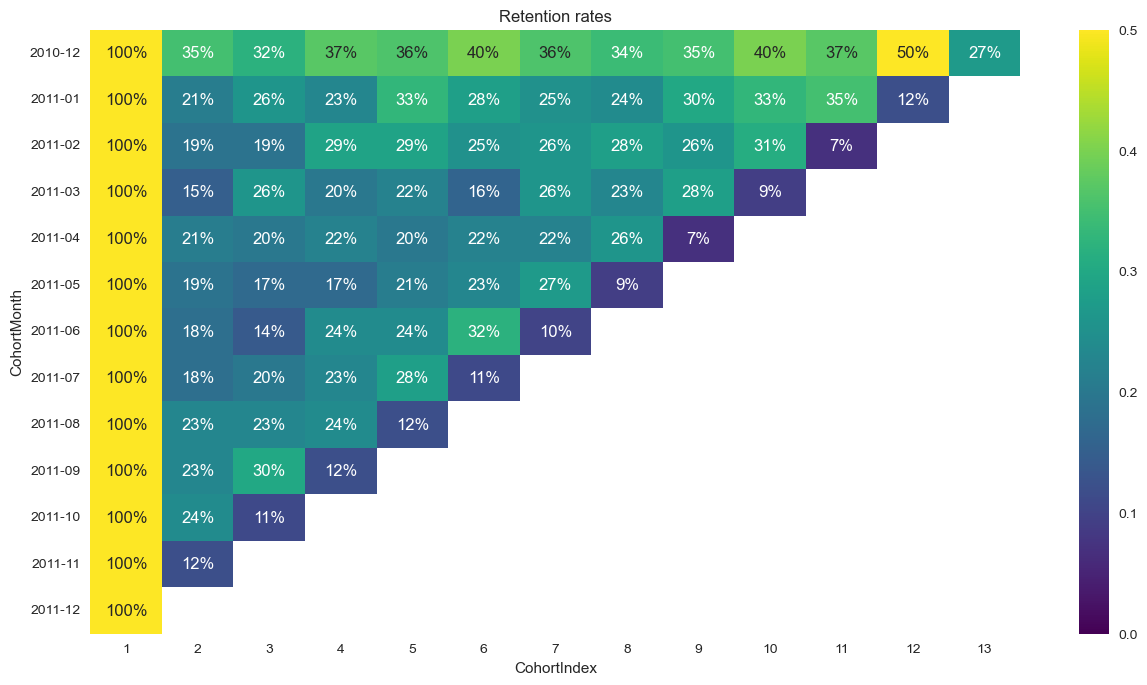

In [122]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention_rate, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap="viridis")
plt.show()

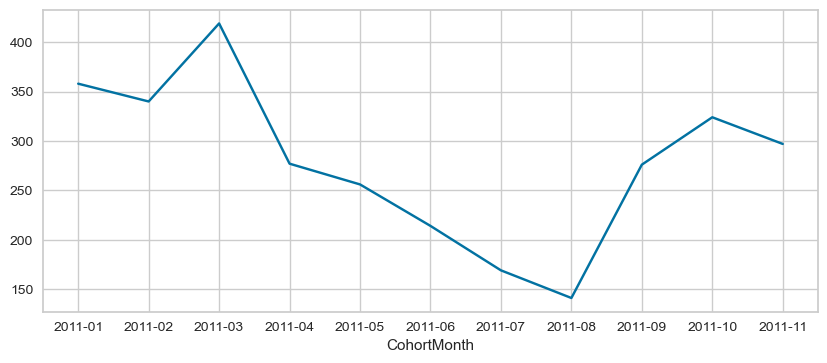

In [123]:
plt.figure(figsize=(10, 4))
xlabel = first_pivot[1][1:-1].index.astype(str)
sns.lineplot(x=xlabel, y=first_pivot[1][1:-1].values);

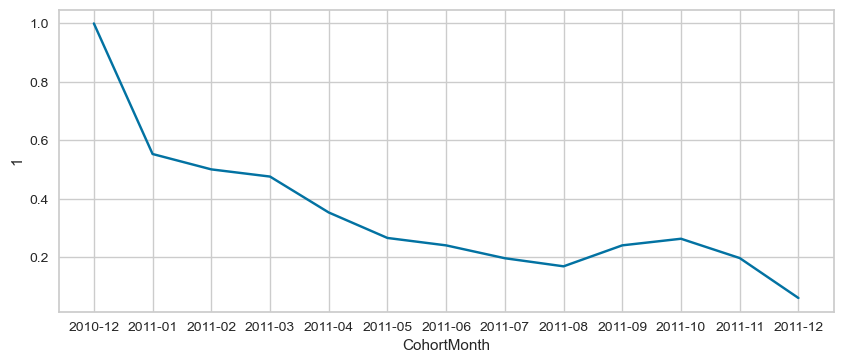

In [124]:
plt.figure(figsize=(10, 4))
xlabel = first_pivot[1].index.astype(str)
ylabel = first_pivot[1]/cohort_df.groupby("InvoiceMonth")["CustomerID"].nunique().values
sns.lineplot(x=xlabel, y=ylabel);

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [125]:
second_cohort = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
second_cohort

CohortMonth  CohortIndex  Quantity
0      2010-12            1    11.364
1      2010-12            2    12.862
2      2010-12            3    13.931
3      2010-12            4    13.874
4      2010-12            5    13.344
..         ...          ...       ...
86     2011-10            2     7.232
87     2011-10            3     8.190
88     2011-11            1     7.767
89     2011-11            2     9.504
90     2011-12            1    15.673

[91 rows x 3 columns]

In [126]:
second_pivot = second_cohort.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity').round(1)
second_pivot

CohortIndex     1      2      3      4      5      6      7       8      9   \
CohortMonth                                                                   
2010-12     11.400 12.900 13.900 13.900 13.300 13.300 14.300  13.800 16.100   
2011-01     18.100  9.600  9.400 15.100 10.100 10.900 13.600  10.800 10.800   
2011-02     11.000 14.000 16.000 12.100 12.300 11.900 13.900  13.700 11.000   
2011-03      9.700 11.400 13.300 10.100 13.500 12.800 13.100  14.100 11.200   
2011-04     10.100 10.200  9.700 11.900 11.900  8.300  9.900   9.400  7.500   
2011-05     10.700  9.400 14.900 12.800 11.000  8.300 10.800 126.900    NaN   
2011-06      9.500 14.800 12.000 12.700  9.800  8.900  9.400     NaN    NaN   
2011-07     10.100 15.000  6.600  8.100  5.800  6.700    NaN     NaN    NaN   
2011-08      9.400  6.000  5.000  5.900  6.600    NaN    NaN     NaN    NaN   
2011-09     11.900  6.100  7.900  9.000    NaN    NaN    NaN     NaN    NaN   
2011-10      8.700  7.200  8.200    NaN    NaN    NaN    NaN     NaN    NaN   
2011-11      7.800  9.500    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
2011-12     15.700    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12     16.100 16.700 12.400 14.500  
2011-01      8.700  8.600 10.000    NaN  
2011-02     12.500 13.800    NaN    NaN  
2011-03      9.700    NaN    NaN    NaN  
2011-04        NaN    NaN    NaN    NaN  
2011-05        NaN    NaN    NaN    NaN  
2011-06        NaN    NaN    NaN    NaN  
2011-07        NaN    NaN    NaN    NaN  
2011-08        NaN    NaN    NaN    NaN  
2011-09        NaN    NaN    NaN    NaN  
2011-10        NaN    NaN    NaN    NaN  
2011-11        NaN    NaN    NaN    NaN  
2011-12        NaN    NaN    NaN    NaN

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

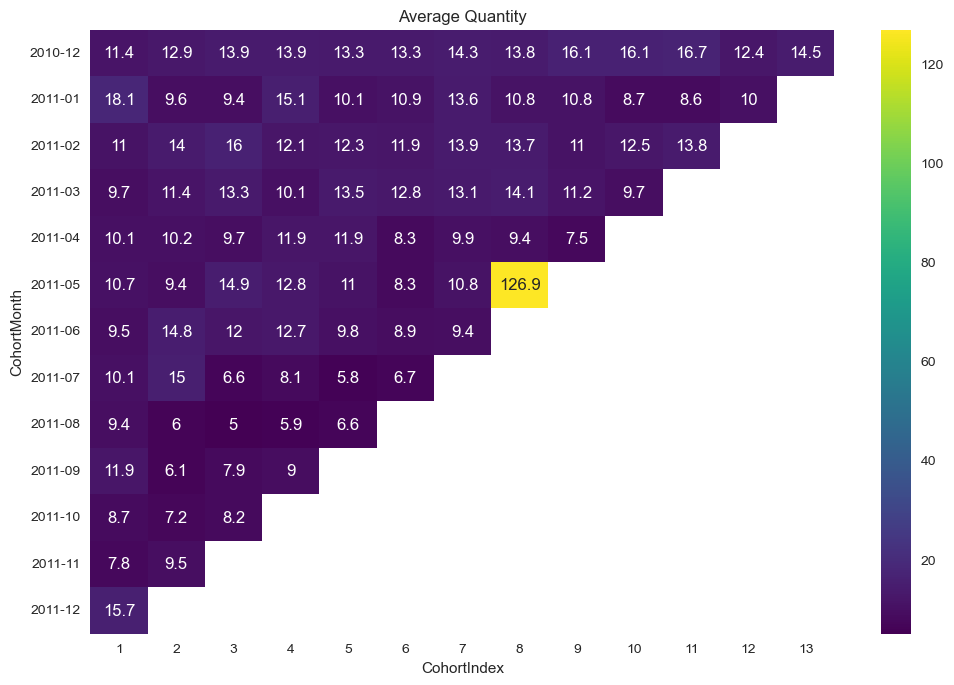

In [127]:
plt.figure(figsize=(12, 8))
plt.title('Average Quantity')
sns.heatmap(data=second_pivot, annot=True, cmap='viridis', fmt='g');

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [128]:
third_cohort = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['TotalPrice'].mean().reset_index()
third_cohort

CohortMonth  CohortIndex  TotalPrice
0      2010-12            1      21.165
1      2010-12            2      22.436
2      2010-12            3      23.966
3      2010-12            4      23.762
4      2010-12            5      20.249
..         ...          ...         ...
86     2011-10            2      11.138
87     2011-10            3      13.771
88     2011-11            1      11.758
89     2011-11            2      13.105
90     2011-12            1      29.441

[91 rows x 3 columns]

In [129]:
third_cohort = third_cohort.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice').round(1)
third_cohort

CohortIndex     1      2      3      4      5      6      7       8      9   \
CohortMonth                                                                   
2010-12     21.200 22.400 24.000 23.800 20.200 25.800 26.000  23.900 26.300   
2011-01     26.700 18.800 15.400 28.200 18.600 19.100 24.200  17.800 17.800   
2011-02     17.000 20.100 19.400 19.200 17.600 16.100 21.300  23.000 18.200   
2011-03     16.700 20.200 22.700 17.700 20.600 18.400 20.700  19.800 16.500   
2011-04     16.600 20.100 19.200 18.700 19.100 14.100 14.900  15.300 11.500   
2011-05     18.100 17.000 22.000 21.100 18.700 13.500 16.700 261.800    NaN   
2011-06     22.900 15.200 19.600 16.600 13.300 13.300 12.700     NaN    NaN   
2011-07     14.900 24.700 10.300 12.900  9.300  9.400    NaN     NaN    NaN   
2011-08     15.200 13.000 12.100 15.600 17.100    NaN    NaN     NaN    NaN   
2011-09     18.300 11.500 13.700 14.000    NaN    NaN    NaN     NaN    NaN   
2011-10     13.500 11.100 13.800    NaN    NaN    NaN    NaN     NaN    NaN   
2011-11     11.800 13.100    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
2011-12     29.400    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12     31.500 31.100 21.700 24.500  
2011-01     17.100 18.000 19.000    NaN  
2011-02     22.000 23.900    NaN    NaN  
2011-03     13.100    NaN    NaN    NaN  
2011-04        NaN    NaN    NaN    NaN  
2011-05        NaN    NaN    NaN    NaN  
2011-06        NaN    NaN    NaN    NaN  
2011-07        NaN    NaN    NaN    NaN  
2011-08        NaN    NaN    NaN    NaN  
2011-09        NaN    NaN    NaN    NaN  
2011-10        NaN    NaN    NaN    NaN  
2011-11        NaN    NaN    NaN    NaN  
2011-12        NaN    NaN    NaN    NaN

In [130]:
cohort_df.groupby("InvoiceMonth")["TotalPrice"].mean()

InvoiceMonth
2010-12   21.165
2011-01   24.605
2011-02   20.220
2011-03   19.646
2011-04   19.788
2011-05   22.051
2011-06   22.328
2011-07   20.743
2011-08   21.717
2011-09   22.529
2011-10   19.101
2011-11   16.973
2011-12   30.367
Freq: M, Name: TotalPrice, dtype: float64

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

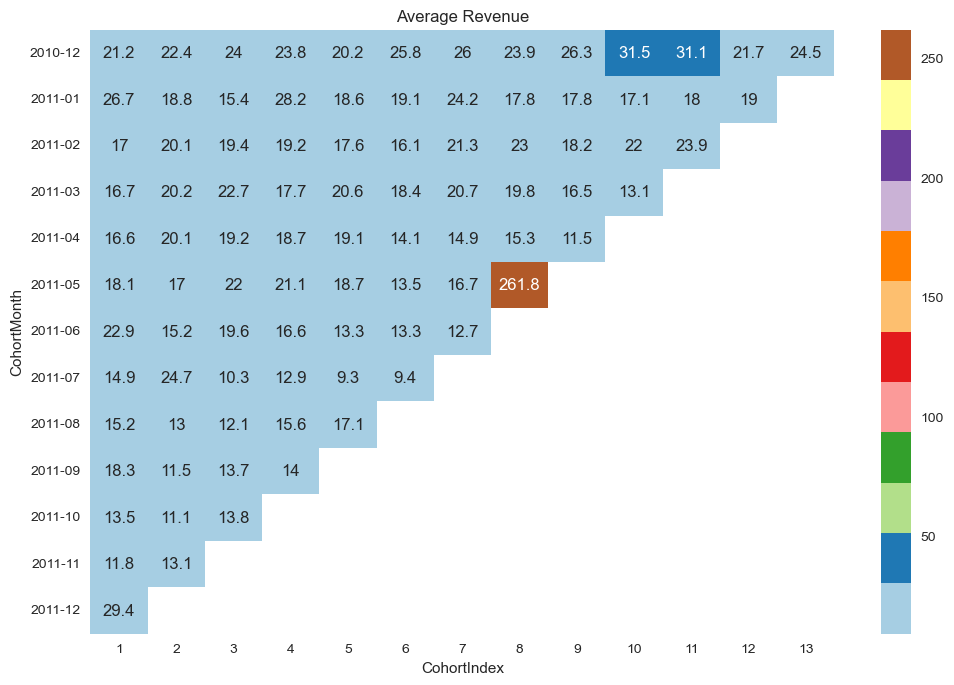

In [131]:
plt.figure(figsize=(12, 8))
plt.title('Average Revenue')
sns.heatmap(data=third_cohort, annot=True, cmap='Paired', fmt='g');

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?